<h2>Importing Relevant Libraries:</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

<h2>Importing Data:</h2>

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
# Computing number of categories of Categorical Features
num_cat = []
cat_feat = []
cat_threshold = 15
for feat in data.columns:
    if data[feat].nunique() < cat_threshold:
        num_cat.append((feat, data[feat].nunique()))
        cat_feat.append(feat)
        
num_cat_df = pd.DataFrame(num_cat, columns=['Feature', 'Num_Categories'], )
num_cat_df

,Feature,Num_Categories
0,Geography,3
1,Gender,2
2,Tenure,11
3,NumOfProducts,4
4,HasCrCard,2
5,IsActiveMember,2
6,Exited,2


<h1>1.) Examine the distribution of Numerical Features
and their outliers.</h1>

In [8]:
def outlier_selection(lower_bound, upper_bound, feature):
    
    accept_outliers = 0.05*len(data[feature])  # 5% of the outliers are acceptable
    no_lower_outliers = data[data[feature] < lower_bound][feature].count() 
    no_upper_outliers = data[data[feature] > upper_bound][feature].count() 

    print('Number of Lower Outliers -->',  no_lower_outliers, 'accounting to ', no_lower_outliers/len(data)*100, '% of data')
    if no_lower_outliers <= accept_outliers: 
        print('Acceptable Outliers and they can be dealt with Winsorizing')
    else:
        print('Unacceptable Outliers and use some preprocessing techique')
    
    print('Number of Upper Outliers -->', no_upper_outliers, 'accounting to ', no_upper_outliers/len(data)*100, '% of data')
    if no_upper_outliers <= accept_outliers:
        print('Acceptable Outliers and they can be dealt with Winsorizing')
    else:
        print('Unacceptable Outliers and use some preprocessing techique')
        
    print('Lower Bound->', lower_bound)
    print('Upper Bound ->', upper_bound )
    
def outlier(feature, data, mild=True, extreme=False):
    
    # declaring some of the parameters:
    
    q1 = np.percentile(data[feature], 25)
    q3 = np.percentile(data[feature], 75)
    iqr = q3-q1
    mild_fac = 1.5
    ext_fac = 2.2
    mild_num = iqr*mild_fac
    ext_num = iqr*ext_fac
    
    if mild:
        lower_bound_mild = q1-mild_num
        upper_bound_mild = q3+mild_num
        outlier_selection(lower_bound_mild, upper_bound_mild, feature)
    
    if extreme:
        lower_bound_ext = q1-mild_ext
        upper_bound_mild = q3+mild_ext
        outlier_selection(lower_bound_ext, upper_bound_ext, feature)
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(121);
    sns.distplot(data[feature])
    plt.title('Distribution of ' + feature)
    plt.axvline(x = lower_bound_mild, color='darkred', label='Outliers beyond the line')
    plt.axvline(x = upper_bound_mild, color='darkred')
    plt.legend()
    
    plt.subplot(122);
    sns.boxplot(y= data[feature])
    plt.title('Boxplot of ' + feature)

Number of Lower Outliers --> 15 accounting to  0.15 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Number of Upper Outliers --> 0 accounting to  0.0 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Lower Bound-> 383.0
Upper Bound -> 919.0


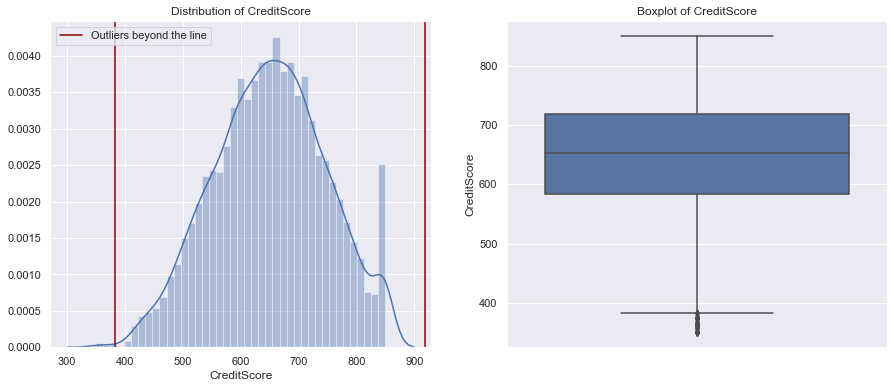

In [37]:
# Outlier Status of CreditScore
outlier('CreditScore', data=data)

Number of Lower Outliers --> 0 accounting to  0.0 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Number of Upper Outliers --> 0 accounting to  0.0 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Lower Bound-> -191466.36000000002
Upper Bound -> 319110.60000000003


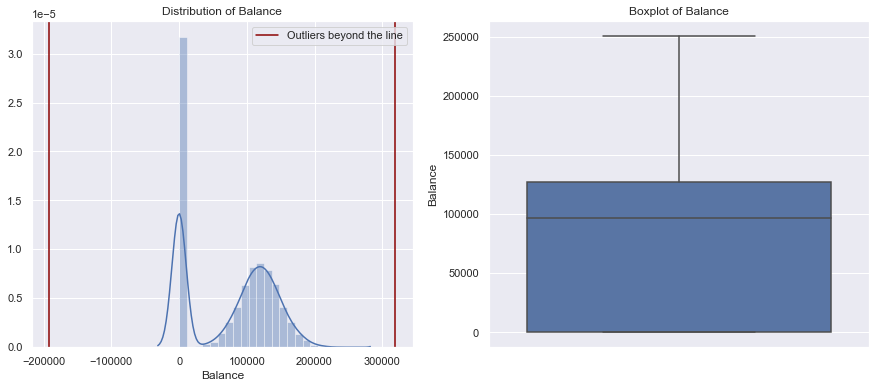

In [38]:
# Outlier Status of Balance
outlier('Balance', data)

Number of Lower Outliers --> 0 accounting to  0.0 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Number of Upper Outliers --> 0 accounting to  0.0 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Lower Bound-> -96577.09624999999
Upper Bound -> 296967.45375


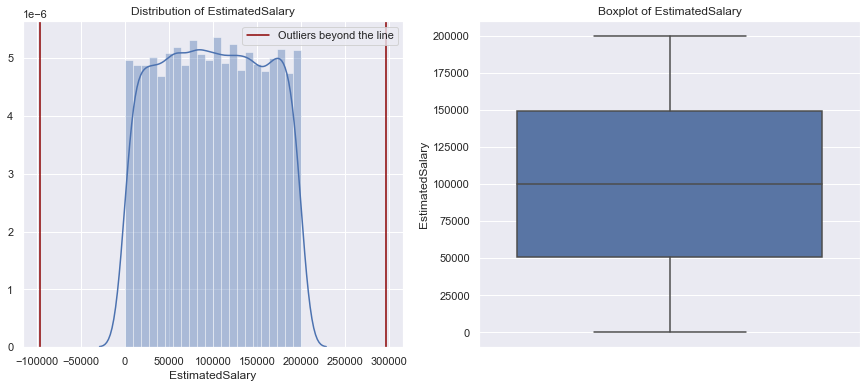

In [119]:
# Outlier Status of Balance
outlier('EstimatedSalary', data)

Number of Lower Outliers --> 0 accounting to  0.0 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Number of Upper Outliers --> 359 accounting to  3.5900000000000003 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Lower Bound-> 14.0
Upper Bound -> 62.0


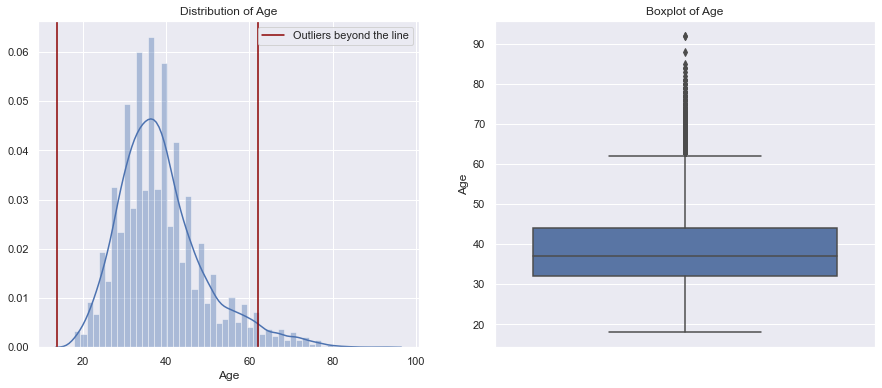

In [120]:
# Outlier Status of Age:
outlier('Age', data)

In [12]:
np.min(data['Age']), np.max(data['Age'])

(18, 92)

<h3>Analysis of Step 1:</h3>
    <ul>
        <li>In CreditScore, the distribution is normally distributed with only 0.15% of the data as outliers on the lower end.</li>
        <li>In Balance, the distribution seems to be bi-modal where there are 2 peaks at values:
        <ol>
            <li>Balance = 0</li>
            <li>Balance = 100000</li>
         </ol>   
        However, there are no outliers observed. It seems that people having 0 as their bank balance is quite prevelant as compared to 1000000.</li>
    <li>Further Analysis should be done about which Country's people have more of 0 as their balance and do they have credit cards and all ?</li>
    <li>Estimated Salary seems to have Uniform Distribution ranging within 0 to 200000 which means we have equal proportion of people from different salary ranges. There are no outliers reported. </li>
    <li>Age has a right Skewed Distribution reported to have 3.59% of the data as outliers on the upper region with Median=37 and Mean=38.92.</li>
    </ul>

<h1>2.) Handle the Outliers of Numerical Features.</h1>
<ul>
    <li>Whenever, the percentage of data as outliers is less than 5%, then always we can simply winsorize the data.</li>
    <li>If % of outliers is greater than 5%, the we can go ahead with some Transformations like Logarithmic Transformation os perfect for exponentially distributed and skewed dataset.</li>
    <li>CreditScore only has 0.15% of the data as outliers, thus winsorizing could be a nice option for it.</li>
    <li>Similarly for Age since it accounts for 3.59% of the data as outliers.</li>
</ul>

In [9]:
def winsorizing(feature, lower_bound=0, upper_bound=0):
    if lower_bound != 0:
        data[feature] = np.where(data[feature] < lower_bound, lower_bound-2, data[feature])
        
    if upper_bound != 0:
        data[feature] = np.where(data[feature] > upper_bound, upper_bound+2, data[feature])
        
    outlier(feature, data)

Number of Lower Outliers --> 15 accounting to  0.15 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Number of Upper Outliers --> 0 accounting to  0.0 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Lower Bound-> 383.0
Upper Bound -> 919.0


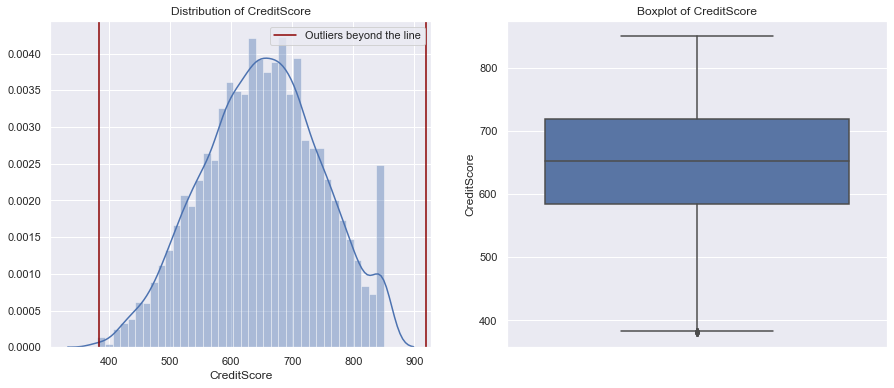

In [10]:
# Handling the outliers of CreditScore:
winsorizing('CreditScore', lower_bound=383.0)

Number of Lower Outliers --> 0 accounting to  0.0 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Number of Upper Outliers --> 359 accounting to  3.5900000000000003 % of data
Acceptable Outliers and they can be dealt with Winsorizing
Lower Bound-> 14.0
Upper Bound -> 62.0


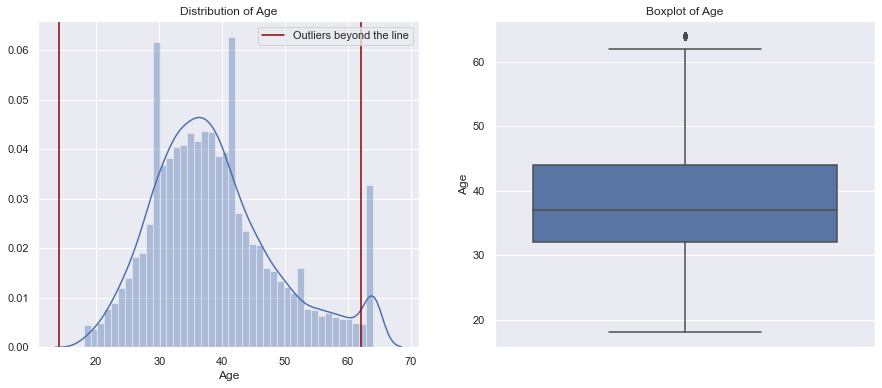

In [11]:
# Handling Outliers of Age:
winsorizing('Age', upper_bound=62.0)

In [12]:
# Since CreditScore and Age seems to have Gaussian Distribution, we should provide the mean and std deviation of both of them:
def mean_std(feature_1, feature_2):
    mean_feat_1 = np.mean(data[feature_1])
    mean_feat_2 = np.mean(data[feature_2])
    std_feat_1 = np.std(data[feature_1])
    std_feat_2 = np.std(data[feature_2])
    print('For {}, Mean --> {} with Standard Deviation -->{}'.format(feature_1, mean_feat_1, std_feat_1))
    print('For {}, Mean --> {} with Standard Deviation -->{}'.format(feature_2, mean_feat_2, std_feat_2))
    
mean_std('CreditScore', 'Age')

For CreditScore, Mean --> 650.5583 with Standard Deviation -->96.5622182901263
For Age, Mean --> 38.7326 with Standard Deviation -->9.923643345062336


In [34]:
data[['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Geography']].head(8)

,Age,CreditScore,Balance,EstimatedSalary,Geography
0,42.0,619.0,0.00,101348.88,France
1,41.0,608.0,83807.86,112542.58,Spain
2,42.0,502.0,159660.80,113931.57,France
3,39.0,699.0,0.00,93826.63,France
4,43.0,850.0,125510.82,79084.10,Spain
5,44.0,645.0,113755.78,149756.71,Spain
6,50.0,822.0,0.00,10062.80,France
7,29.0,381.0,115046.74,119346.88,Germany


In [29]:
data[data['Geography']=='France'][['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Geography']].head()

,Age,CreditScore,Balance,EstimatedSalary,Geography
0,42.0,619.0,0.00,101348.88,France
2,42.0,502.0,159660.80,113931.57,France
3,39.0,699.0,0.00,93826.63,France
6,50.0,822.0,0.00,10062.80,France
8,44.0,501.0,142051.07,74940.50,France


In [30]:
data[data['Geography']=='Germany'][['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Geography']].head()

,Age,CreditScore,Balance,EstimatedSalary,Geography
7,29.0,381.0,115046.74,119346.88,Germany
15,45.0,616.0,143129.41,64327.26,Germany
16,58.0,653.0,132602.88,5097.67,Germany
26,36.0,756.0,136815.64,170041.95,Germany
28,43.0,574.0,141349.43,100187.43,Germany


In [31]:
data[data['Geography']=='Spain'][['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Geography']].head()

,Age,CreditScore,Balance,EstimatedSalary,Geography
1,41.0,608.0,83807.86,112542.58,Spain
4,43.0,850.0,125510.82,79084.10,Spain
5,44.0,645.0,113755.78,149756.71,Spain
11,24.0,497.0,0.00,76390.01,Spain
14,35.0,635.0,0.00,65951.65,Spain


<h2>Summary Table of Analysis of Numerical Features:</h2>
<table>
    <caption>
        Summary Table of Analysis of Numerical Features
        </caption>
    <tr>
        <th>Numerical Features</th> <th>Analysis and Conclusions</th>
   </tr>
    <tr>
        <th>CreditScore</th> <td><ul> <li>Most of the customers seems to have the Credit score between 600 to 700</li>
<li>Upper Threshold = 919.0 units</li>
<li>Lower Threshold = 383.0 units</li>
<li>Range = 350 to 850 units</li>
<li>0.15% of the data accounts for the outliers towards the lower whisker of the boxplot and can be dealt with ‘winsorizing’ by equating them to the value equal to lower threshold. No outliers lie towards the upper whisker.</li>
</ul></td>
   </tr>
    <tr>
        <th>Balance</th> <td><ul> <li>A bi-modal distribution for ‘Bank Balance’ is observed where the peak is situated at balance=0 Euros and balance = 100000 Euros. Thus, it means most of the customers have balance equal to 0 and 100000 euros.</li>
        <li>It can be observed from the boxplot that 25% of the total customers have balance equal to 0 euros, which is extremely bad for the bank as far as capital generation is concerned and the bank needs to improve upon this by making some new policy.</li>
<li>Since minimum is 0, hence Lower Threshold goes to negative and equals to (-)191466.36 euros because lower threshold = Q1 – IQR*1.5.</li>
<li>Upper Threshold = 319110.60 euros.</li>
<li>Range = 0 to 250898.09 euros.</li>
<li>Hence, no outliers exist for this feature and can also be interpreted from the position of red line and boxplots (no asterisk in the boxplots).</li></ul>
</td>
   </tr>
    <tr>
        <th>EstimatedSalary</th> <td> <ul> <li>It can be observed from the graph that the data of Estimated Salary is uniformly distributed which means that there exists equal proportion of customers for different salary ranges.</li>
<li>Since the minimum value is 11.58 euros, thus Lower Threshold is negative i.e. (-)96577.0962 euros since lower threshold = Q1 – IQR*1.5.</li> 
<li>Upper Threshold = 296967 euros.</li>
<li>Range of Data = 11.58 to 199992.48 euros.</li>
<li>Hence, no outliers exist for this feature and can also be understood from the position of red line and boxplots as well (no asterisk in the boxplots).</li> </ul>
</td>
   </tr>
    <tr>
        <th>Age</th> <td> <ul> <li>The distribution of ‘Age’ is right-skewed and we can see most of the customers of the bank belongs to the age of around 40 years. </li>
<li>Lower Threshold = 14 years.</li>
<li>Upper Threshold = 62 years.</li>
<li>Range = 18 to 92</li>
<li>3.59% of the data accounts for the outliers towards the upper whisker of the boxplots as can be observed from the asterisk, which could also be dealt with ‘winsorizing’ by equating them to the value equal to upper threshold i.e. 62 years. No outliers lie towards the lower whisker.</li></ul>
</td>
   </tr>
</table>

<h1>3.) Countplots of each of the Categorical Feature.</h1>

In [12]:
# already created
cat_feat

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

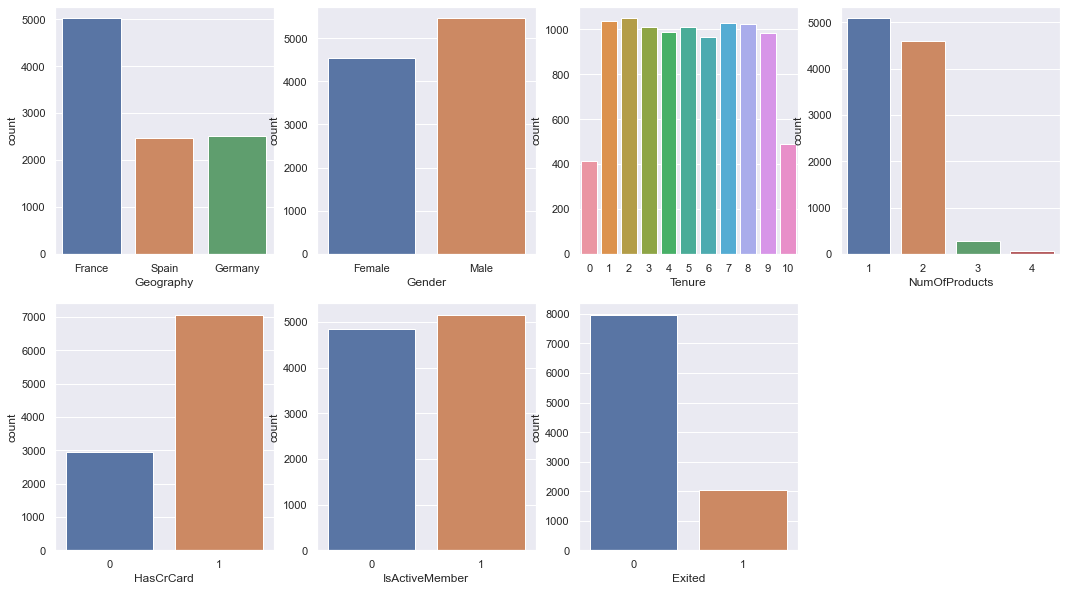

In [13]:
# Count plots of categorical variable:

def count_plot():
    
    i = 1
    plt.figure(figsize=(18,10))
    for cat in cat_feat:
        plt.subplot(2, 4, i)
        sns.countplot(x=cat, data=data)
        i += 1

count_plot()

<h3>Analysis of Step-3:</h3>
<ul>
    <li>Geography has 3 categories:
        <ol> <li>France --> Around 5000 people.</li> 
            <li>Germany  -->  Around 2500 people</li>
             <li>Spain --> Around 2500 People</li>
            <li>ANOVA Test will likely to significant since France has twice the customers as compared to Germany and Spain and thus it is assumed that mean of France is likely to vary.</li>
        </ol> 
    </li>
    <li> Gender has 2 Categories:
            <ol> <li>Female --> Around 4500 customers</li> 
                    <li>Male --> Around 5500 Customers</li>
                     <li>T-test will likely to be significant since proportion of males is quite higher than females and thus their means would also like to vary. </li> 
        </ol>
    </li>
    <li> Tenure has 11 categories:           :
            <ol>  <li>Frequency or Proportion of people with Tenures 1 to 9 are pretty much the same i.e. around 1000 people lie in each of the tenures.</li>
                 <li> Proportion of people with Tenure=0 and Tenure=10 are pretty same i.e. 500 people.</li> 
        </ol>
    </li>
    <li> NumOfProducts has 4 categories:
            <ol>  <li>People using the 1st Product are maximum and are greater than 5000. </li>  
                     <li>People using the 2nd Product are around 4500 in number. Thus they are also pretty high</li>
                 <li>Number of People using Product 3rd and 4th are very very less.</li>
                 <li>It means the demand of product 1 and 2 is really high.</li>
                 <li>ANOVA test again is likely to be significant since there is high variation in number of people using products 1-2 and 3-4.</li> 
        </ol>
    </li>
    <li> HasCrCard means the number of customers which have credit card or not:
            <ol>  <li>Around 7000 people have credit cards</li>  
                 <li>3000 people do not have credit cards.</li> 
                <li>T-test is more likely to be significant due to high unsymmetrical distribution of customers.</li> 
        </ol>
    </li>
    <li> IsActiveMember means whether the person is an active member or not:
            <ol> <li> Around 5200 people are active members.</li> 
                  <li>And 4800 people are not active members.</li> 
                    <li>T-test might be significant or might be not since the counts are pretty same.</li> 
            </ol>
    </li>
    <li> Exited means number of customers who exited our bank's service:
            <ol> <li>2000 people have Left the Bank's Service.</li>  
                  <li>8000 people are still the customers of bank</li>
                <li>T-test is likely to be significant due to high unsymmetrical distribution of customers.</li> 
        </ol>
    </li>
    
    
</ul>

<h1>Statistical Analysis --> t-test and ANOVA:</h1>

In [13]:
# Numerical Features
num_feat = []
for feat in data.columns:
    if feat not in cat_feat:
        num_feat.append(feat)
        
num_feat, cat_feat

(['CreditScore', 'Age', 'Balance', 'EstimatedSalary'],
 ['Geography',
  'Gender',
  'Tenure',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'Exited'])

In [14]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [15]:
# mean_each_cat(categorical_feature) return the table which contains the mean of each category with respect to each 
# numerical feature:

def mean_each_cat(feat):
    (i, j) = (0, 4)
    result_dict = {}
    mean_num_feat = []
    for category in data[feat].unique():
        for feature_num in num_feat:
            x_bar = data[data[feat] == category][feature_num].mean()
            mean_num_feat.append(x_bar)
        result_dict[category] = mean_num_feat[i:j]
        i +=4
        j +=4
        res_data = pd.DataFrame(result_dict, columns=data[feat].unique(), index=num_feat)
        stat_test(feat)
    return res_data

# for performing ind_ttest, first we need to groupby our data based upon the categories of particular categorical variable:
# then after grouping, we need to consider the sample of same column and interpret the result: 

def stat_test(feat):
    
    grp_data = data.groupby(by=feat)
    result = {}
    if data[feat].nunique() == 2:
        # t-test
        
        group_1 = grp_data.get_group(data[feat].unique()[0])
        group_2 = grp_data.get_group(data[feat].unique()[1])
        for feature_num in num_feat:
            t_stat, p_val = ttest_ind(group_1[feature_num], group_2[feature_num])
            result[feature_num] = [t_stat, p_val]
        
        data_res = pd.DataFrame(result, index=['T-Statistic', 'P-Value'])
        return data_res    
                    
    
    if data[feat].nunique() > 2:
        # Anova
        data_by_category = []
        
        if data[feat].nunique() == 3:
            
            for category in data[feat].unique():
                data_by_cat = grp_data.get_group(category)
                data_by_category.append(data_by_cat)
                
            for num_feature in num_feat:
                f_val, p_val = f_oneway(data_by_category[0][num_feature], data_by_category[1][num_feature], data_by_category[2][num_feature])
                result[num_feature] = [f_val, p_val]
            data_res = pd.DataFrame(result, index=['F-Statistic', 'P-Value'])
            return data_res
         
        if data[feat].nunique() == 4:
        
            
            for category in data[feat].unique():
                data_by_cat = grp_data.get_group(category)
                data_by_category.append(data_by_cat)
                
            for num_feature in num_feat:
                f_val, p_val = f_oneway(data_by_category[0][num_feature], data_by_category[1][num_feature], data_by_category[2][num_feature], data_by_category[3][num_feature])
                result[num_feature] = [f_val, p_val]
            data_res = pd.DataFrame(result, index=['F-Statistic', 'P-Value'])
            return data_res
        
        if data[feat].nunique() == 11:
        
            
            for category in data[feat].unique():
                data_by_cat = grp_data.get_group(category)
                data_by_category.append(data_by_cat)
                
            for num_feature in num_feat:
                f_val, p_val = f_oneway(data_by_category[0][num_feature], data_by_category[1][num_feature], data_by_category[2][num_feature], data_by_category[3][num_feature], data_by_category[4][num_feature], data_by_category[5][num_feature], data_by_category[6][num_feature], data_by_category[7][num_feature], data_by_category[8][num_feature], data_by_category[9][num_feature], data_by_category[10][num_feature])
                result[num_feature] = [f_val, p_val]
            data_res = pd.DataFrame(result, index=['F-Statistic', 'P-Value'])
            return data_res
        

# Boxplots of each category with respect to numerical features:
def rel_plot(feat):
    i = 1
    plt.figure(figsize=(12,6))
    for num_feature in num_feat:
        plt.subplot(2, 2, i)
        sns.boxplot(x=feat, y=num_feature, data=data)
        i +=1    


# Statistical Function which contains all of the above function:
def statistical_analysis(feat):
    print('Statistical Analysis of-->', feat, '\n')
    print('Count Plot of --> ', feat, '/n')
    sns.countplot(x=feat, data=data)
    plt.show()
    print('\n********************************************************************************************************\n')
    
    print('Table of Mean of each Category of-> ', feat,  'with respect to Numerical Feature :\n')
    print(mean_each_cat(feat))
    print('\n**********************************************************************************************************\n')
    
    if data[feat].nunique() == 2:
        print('T-test Results Table: \n')
    else:
        print('ANOVA Results Table: \n')
    stat_test_data = stat_test(feat)
    print(stat_test_data)
    print('\n*************************************************************************************************************\n')
    
    print('Relationship between --> ', feat,  'and Numerical Feature: \n')
    rel_plot(feat)

Statistical Analysis of--> Geography 

Count Plot of -->  Geography /n


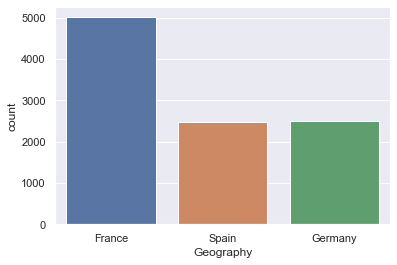


********************************************************************************************************

Table of Mean of each Category of->  Geography with respect to Numerical Feature :

                       France         Spain        Germany
CreditScore        649.693857    651.368187     651.486250
Age                 38.315716     38.715382      39.582702
Balance          62092.636516  61818.147763  119730.116134
EstimatedSalary  99899.180814  99440.572281  101113.435102

**********************************************************************************************************

ANOVA Results Table: 

             CreditScore        Age     Balance  EstimatedSalary
F-Statistic     0.403801  13.667180  958.425446         0.582761
P-Value         0.667788   0.000001    0.000000         0.558374

*************************************************************************************************************

Relationship between -->  Geography and Numerical Feature: 



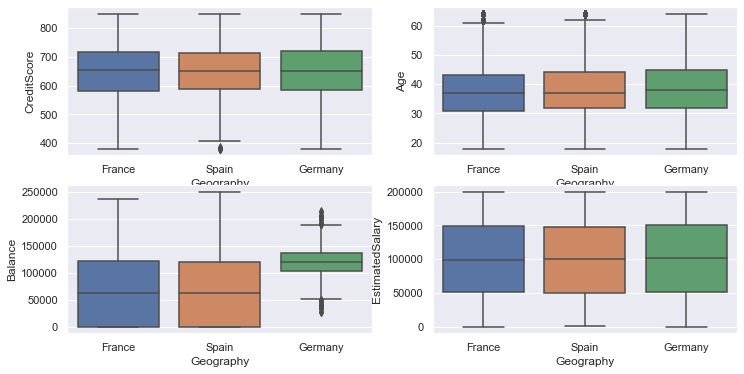

In [21]:
# statistical Analysis of Categorical Feature---> 'Geography' :
statistical_analysis('Geography')

<h3>Analysis of Categorical Feature Geography:</h3>
<ul>
    <li>In ANOVA, Null Hypothesis means that the mean of each category with respect to numerical feature is Same. The tests for which the result is non-significant are for the features --> CreditScore and EstimatedSalary.</li>
    <li>More Younger Lot belongs to France and Spain and that might be the reason of about 25% of people having 0 Balance. In Germany, older people are observed and hence, it reflects in the balance as well.</li>
    <li>Number of Customers in France is twice as compared to those in Germany and France.</li>
    <li>If any policies are to be created with respect to CreditScore and Estimated Salary, then they can be applied to all the 3 regions simultaneously, since thier means are calculated to be the same for Population in France, Germany and Spain.</li>
    <li>In Spain and France 25 % customers have Balance = 0. Thus it needs a nice policy to be created else it would become problematic for bank as far as capital generation is concerned.</li>
    </ul>

Statistical Analysis of--> Gender 

Count Plot of -->  Gender /n


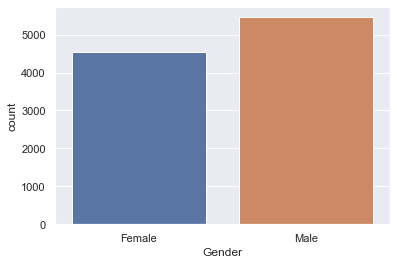


********************************************************************************************************

Table of Mean of each Category of->  Gender with respect to Numerical Feature :

                        Female          Male
CreditScore         650.867709    650.300715
Age                  39.043584     38.473704
Balance           75659.369139  77173.974506
EstimatedSalary  100601.541382  99664.576931

**********************************************************************************************************

T-test Results Table: 

             CreditScore       Age   Balance  EstimatedSalary
T-Statistic     0.292333  2.860190 -1.208624         0.811179
P-Value         0.770038  0.004243  0.226836         0.417282

*************************************************************************************************************

Relationship between -->  Gender and Numerical Feature: 



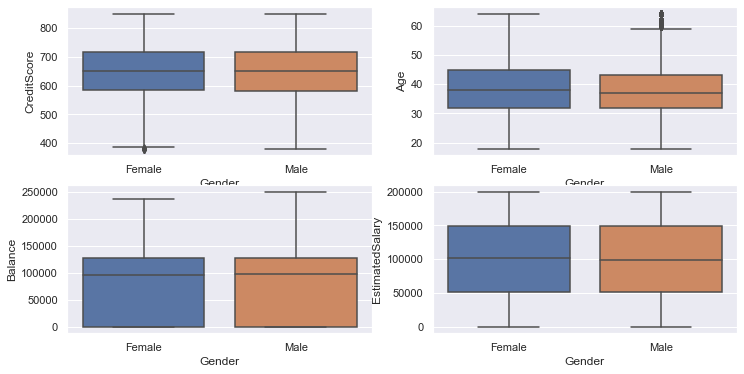

In [22]:
# statistical Analysis of Gender
statistical_analysis('Gender')

<h3>Analysis of Categorical Feature --> Gender</h3>
<ul>
     <li>Difference in Count between Males and Females is 1000.</li>
     <li>We have got non-significant T-test for all the numerical features except Age which means males and females tend to have the same CreditScore, Balance and EstimatedSalary.</li>
    <li>Females tend to have higher age as compared to males</li>
    <li>Males tend to have more mean balance in their accounts and hence their chances of getting the loan is also increased, but on Average, both have almost equal Balance. </li>
    </ul>

Statistical Analysis of--> NumOfProducts 

Count Plot of -->  NumOfProducts /n


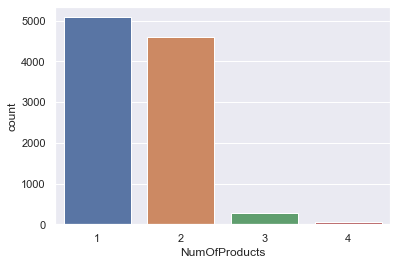


********************************************************************************************************

Table of Mean of each Category of->  NumOfProducts with respect to Numerical Feature :

                            1              3              2              4
CreditScore        649.163847     648.259398     652.195425     653.666667
Age                 39.484658      43.045113      37.559695      45.616667
Balance          98551.870614   75458.328195   51879.145813   93733.135000
EstimatedSalary  99487.256851  104318.130564  100452.012821  104763.723333

**********************************************************************************************************

ANOVA Results Table: 

             CreditScore           Age        Balance  EstimatedSalary
F-Statistic     0.864052  5.846069e+01   5.219872e+02         0.858072
P-Value         0.458902  1.858444e-37  3.699120e-315         0.462063

************************************************************************************

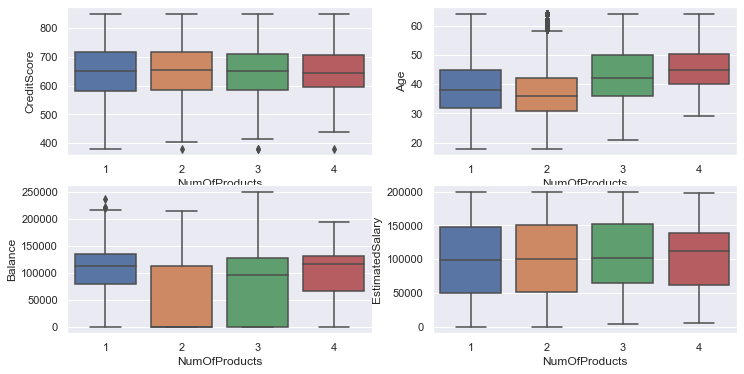

In [24]:
# Statistical Analysis of NumOfProducts:
statistical_analysis('NumOfProducts')

<h3>Analysis of Categorical Feature --> NumOfProducts</h3>
<ul>
    <li> <ol> <li>Product 1 --> 5000 customers</li> 
        <li>Product 2 --> 4500 customers</li> <li>Product 3-->300 customers</li>  <li>Product 4 -->200 customers</li></ol> </li>
    <li>Null has been rejected for CreditScore and Estimated Salary, thus it means customers consuming all of these 4 services have same mean for these 2 numerical features.</li>
    <li>Customers using Product 1 are middle-aged around 39years and hence their balance seems to be quite good.</li>
    <li>Customers using Product 2 lie among the youngest lot i.e. 35 years and they tend to have quite low balance with about 50% of the people have balance=0.</li>
    <li>Customers using Product 3 have their median age as 43, with about less than 25% people have balance=0</li>
    <li>Customers using Product 4 have their median age as 46, which tend to have the highest median balance i.e. 135000.</li>
    <li>Hence generally, Product-1 and Product-2 is basically used by younger people who have low balance in their accounts. Product-3 and Product-4 are been used by older people and they tend to have higher balance in their accounts.</li>
    <li>From the countplots, we can observe, the maximum number of customers belong to median age of 40. However we have very less amount of customers of older age and thus proportion of customers usinf Product 3 and Product 4 is pretty less.</li>
    </ul>

Statistical Analysis of--> HasCrCard 

Count Plot of -->  HasCrCard /n


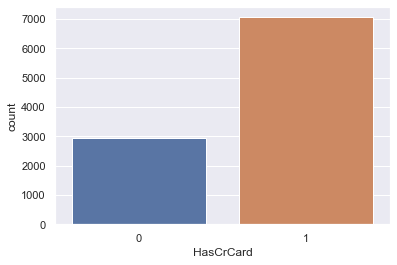


********************************************************************************************************

Table of Mean of each Category of->  HasCrCard with respect to Numerical Feature :

                            1              0
CreditScore        650.220978     651.366384
Age                 38.653296      38.922581
Balance          75886.913330   77920.787552
EstimatedSalary  99721.161949  100974.397711

**********************************************************************************************************

T-test Results Table: 

             CreditScore       Age  Balance  EstimatedSalary
T-Statistic    -0.540638 -1.236865 -1.48585        -0.993291
P-Value         0.588770  0.216166  0.13735         0.320592

*************************************************************************************************************

Relationship between -->  HasCrCard and Numerical Feature: 



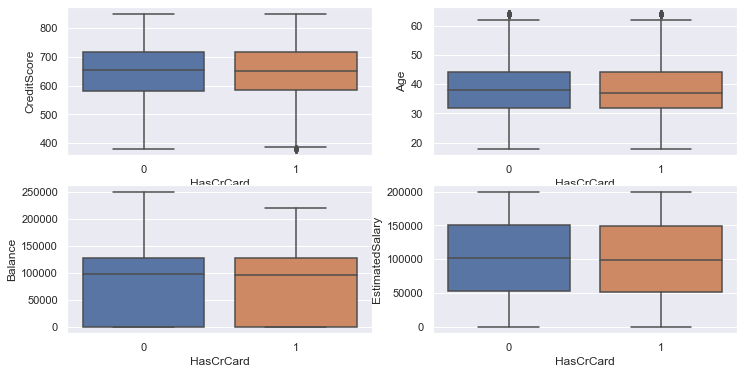

In [25]:
# Statistical Analysis of -> HasCrCard:
statistical_analysis('HasCrCard')

<h3>Analysis of Categorical Feature--> HasCrCard:</h3>
<ul>
    <li>There is a great difference in the proportion of the people who have credit cards and those who do not have credit cards.</li>
    <li><b>This is a very intuitive analysis that for all the numerical features, the null hypothesis has been accepted, which clearly indicates that 'HasCrCard' feature is no way explaining the variance of any of the numerical feature and is a clear sign that this feature does not seem to add any value to the data since no variance is explained by this feature and hence not allowing the model to learn variety from it. Thus, while feature selection, we can investigate the importance of this variable.</b></li>
    <li>Null Hypothesis with respect to all the features have been accepted which means that peope having CreditCards and not having CreditCards account for equal mean with respect to each numerical feature.</li>
    <li>This means people having a CreditCard and those who do not have credit card have the same balance, same age, same creditscore and same salary.</li>
    <li>Thus it might be possible that the person has not left the bank but has left some of the services of the bank since there is no way we could distinguish between people who have credit cards from those who do not have.</li>
    </ul>

Statistical Analysis of--> IsActiveMember 

Count Plot of -->  IsActiveMember /n


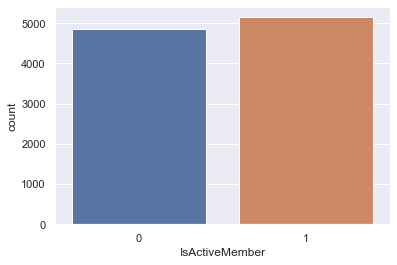


********************************************************************************************************

Table of Mean of each Category of->  IsActiveMember with respect to Numerical Feature :

                            1              0
CreditScore        652.952048     648.015467
Age                 39.462434      37.957311
Balance          75875.422145   77134.376863
EstimatedSalary  99452.965894  100767.203854

**********************************************************************************************************

T-test Results Table: 

             CreditScore           Age   Balance  EstimatedSalary
T-Statistic     2.555579  7.601175e+00 -1.008360        -1.142103
P-Value         0.010616  3.198113e-14  0.313306         0.253438

*************************************************************************************************************

Relationship between -->  IsActiveMember and Numerical Feature: 



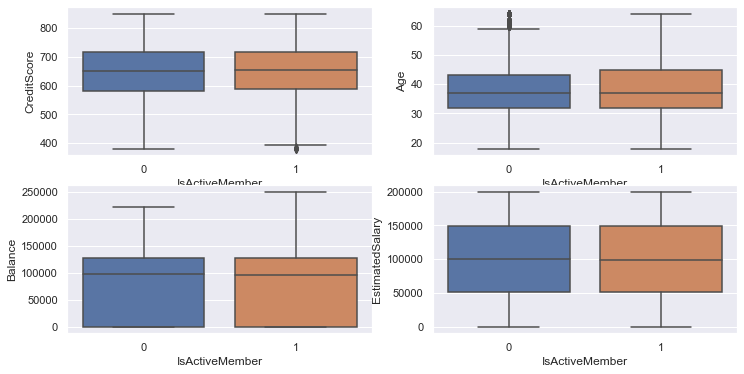

In [27]:
# Statistical Analysis of IsActiveMember
statistical_analysis('IsActiveMember')

<h3>Analysis Of Categorical Feature--> IsActiveMember:</h3>
<ul>
    <li>Countplot shows that counts of both the categories is quite similar i.e. 5200 and 4800</li>
    <li>Null has been rejected for Age and CreditScore i.e. the two groups have different means for these 2 categorical features.</li>
    <li>People who are more active tend to have higher creditScore as well as higher age on average.</li>
    </ul>

Statistical Analysis of--> Exited 

Count Plot of -->  Exited /n


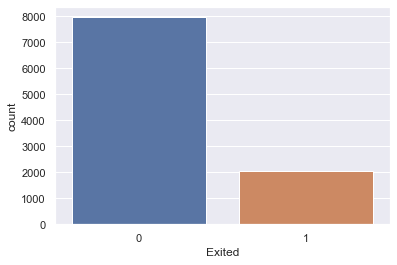


********************************************************************************************************

Table of Mean of each Category of->  Exited with respect to Numerical Feature :

                             1             0
CreditScore         645.496318    651.853196
Age                  44.753068     37.192515
Balance           91108.539337  72745.296779
EstimatedSalary  101465.677531  99738.391772

**********************************************************************************************************

T-test Results Table: 

             CreditScore            Age       Balance  EstimatedSalary
T-Statistic    -2.652038   3.223631e+01  1.193624e+01         1.209654
P-Value         0.008013  5.403441e-217  1.275563e-32         0.226440

*************************************************************************************************************

Relationship between -->  Exited and Numerical Feature: 



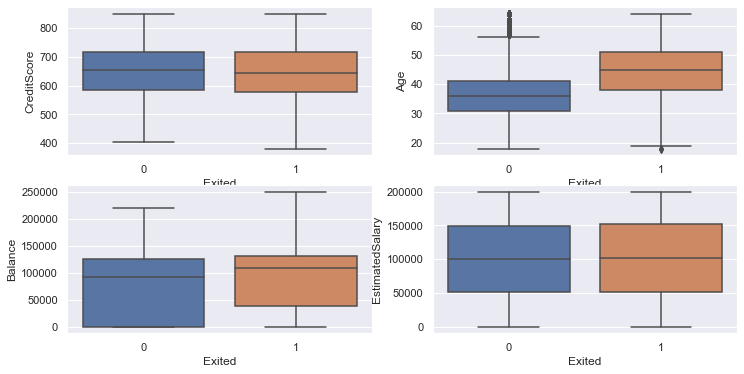

In [28]:
# Statistical Analysis of Exited:
statistical_analysis('Exited')

<h3>Analysis of Dependent Categorical Feature--> Exited:</h3>
<ul>
    <li>The ratio of people who have left the bank to those who haven't is 8:2.</li>
    <li>We have rejected null for the 3 numerical features i.e. CreditScore, Age and Balance. It seems EstimatedSalary does not explain much variance of dependent feature-> 'Exited' since there is no difference in the means of two groups.</li>
    <li>Customers who are still associated with the bank have median age = 35, where as for those who have left the bank, have median age=45.</li>
    <li>Customers whp are still associated with the bank tend to have lower balance and 25% of them have balance=0. Where as for the customers who have left the bank tend to have higher balance. This assures that people with lower age have less balance and people who are old, have high balance.</li>
    <li>Present customers have higher CreditScore as compared to the customers who have left the services.</li>
    <li>One important point is --> EstimatedSalary's mean has been the same for all the categories and this means it is not explaining the variance and I think hence is not a very useful Feature to predict whether the customer will leave the service of bank or not.</li>
    </ul>

Statistical Analysis of--> Tenure 

Count Plot of -->  Tenure /n


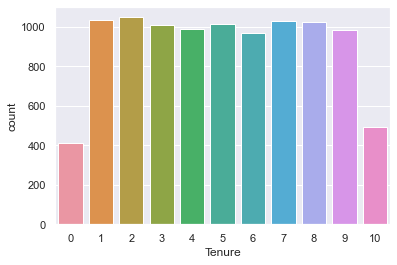


********************************************************************************************************

Table of Mean of each Category of->  Tenure with respect to Numerical Feature :

                           2              1              8              7   \
CreditScore        652.832061     648.836715     647.771707     649.613813   
Age                 38.878817      39.240580      38.295610      38.264591   
Balance          76839.626469   78555.384222   77936.598254   75551.634426   
EstimatedSalary  98312.359857  100468.618957  101072.102937  101257.240370   

                           4             6             3              10  \
CreditScore        651.537917    647.441572    650.560951     653.779592   
Age                 38.101112     38.612203     38.830525      38.851020   
Balance          74059.394065  74403.942637  77668.059881   73927.504000   
EstimatedSalary  99867.777826  99168.733154  97667.196283  102805.909224   

                            5           

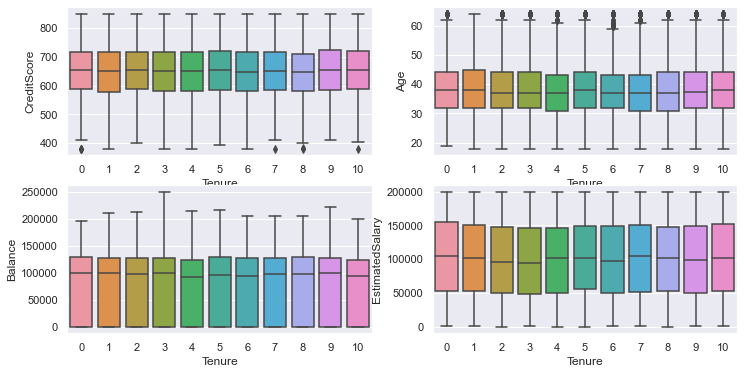

In [27]:
# statistical analysis of Tenure:
statistical_analysis('Tenure')

<h3>Analysis of Tenure:</h3>
<ul>
    <li>Customers belonging to different tenures have same mean with respect to all the numeric features and their corresponding p-values are non-significant since they are large than 0.05. </li>
    </ul>

<h2>Summary Table of Analysis of Categorical Features:</h2>
<table>
    <caption>
        Summary Table of Analysis of Categorical Features
        </caption>
    <tr>
        <th>Categorical Features</th>
        <th>Analysis and Conclusions</th>
    </tr>
    <tr>
        <th>Geography</th>
        <td><ul> <li>Result is Significant for ‘Age’ and ‘Balance’.</li>
            <li>Thus, the variability in ‘Age’ and ‘Balance’ is been explained by the categories of ‘Geography’. Further, it has also been noticed that more younger lot of people belong to France and Spain and that is the reason they have low balance in their accounts since less than 25% of people have balance = 0 in France and Spain (since most of the youths are reckless and spend a lot and they also earn less since they are in their initial years of career.)</li>
            <li>Number of customers in France are double as compared to those in Germany and Spain.</li></ul>
</td>
    </tr>
    <tr>
        <th>Gender</th>
        <td><ul><li>Result is significant for only ‘Age’ and hence the variability of ‘Age’ has been explained by the categories of ‘Gender’.</li> 
            <li>The number of males is 1000 units greater than the number of females. It has been found Females have higher age as compared to males.</li></ul></td>
    </tr>
    <tr>
        <th>NumberOfProducts</th>
        <td><ul><li>Result is significant for ‘Age’ and ‘Balance’ thus the variability of these two features have been explained by categories of ‘Number of Products’.</li> 
            <li>Number of customers using Product-1 and Product-2 are quite high and sum up to 9500 while those using Product-3 and Product-4 sum up to 500.</li> 
            <li>Customers using Product-1 and Product-2 belong to younger age where whereas those using Product-3 and Product-4 belong to older age group.</li>
            <li>It has also been found that customers using Product-1 and Product-2 have very low balance in their accounts unlike the customers using Product-3 and Product-4, which have good balance in their account.</li>
            <li>Hence this feature could prove to be really important, since so many conclusions can be drawn.</li></ul></td>
    </tr>
    <tr>
        <th>HasCrCard</th>
        <td><ul><li><strong>Result is significant for none of the numerical feature </strong>and this represents a very intuitive reason that this feature is not of much importance, since it does not explain variability of any of the numerical features.</li>
            <li>Hence, in future, while performing Feature Selection, we should see whether this feature is considered as important or not.</li></ul></td>
    </tr>
    <tr>
        <th>IsActiveMember</th>
        <td><ul><li>Result is significant for only ‘Age’ and this means, this feature only explains the variability of ‘Age’.</li> 
            <li>The proportion of people in both the categories are approximately equal.</li>
            <li>It has been found that people who are more active belong to the higher age group.</li></ul></td>
    </tr>
    <tr>
        <th>Tenure</th>
        <td><ul><li>Results is significant for none of the numerical feature and this also seem to be an unimportant feature just like ‘HasCrCard’ since it does not explain variance of any of the numerical features.</li> 
            <li>It will be interesting to see if it is considered as an important feature during Feature Selection</li></ul></td>
    </tr>
    <tr>
        <th>Exited</th>
        <td><ul><li>Result is significant for all the numerical features except ‘Estimated Salary’. Thus, variance is explained for 3 of the numerical features.</li>
            <li>The proportion of customers who left the bank services are 20% and the proportion of current customers are 80%. Hence the data is unsymmetrically distributed for target class.</li>
            <li>It has been found that the customers who have left the bank were aged around 45 years and above, whereas the ones who are currently using the services are 35 years.</li>
            <li>The bank balance of the customers exited is pretty high as compared to the customers who are continuing the services of the bank and 25% of the current customers have been observed to have 0 as their bank balance.</li></ul>
</td>
    </tr>
    
   </table>

<h2>Pairplot to Analyse the Numerical Features:</h2>

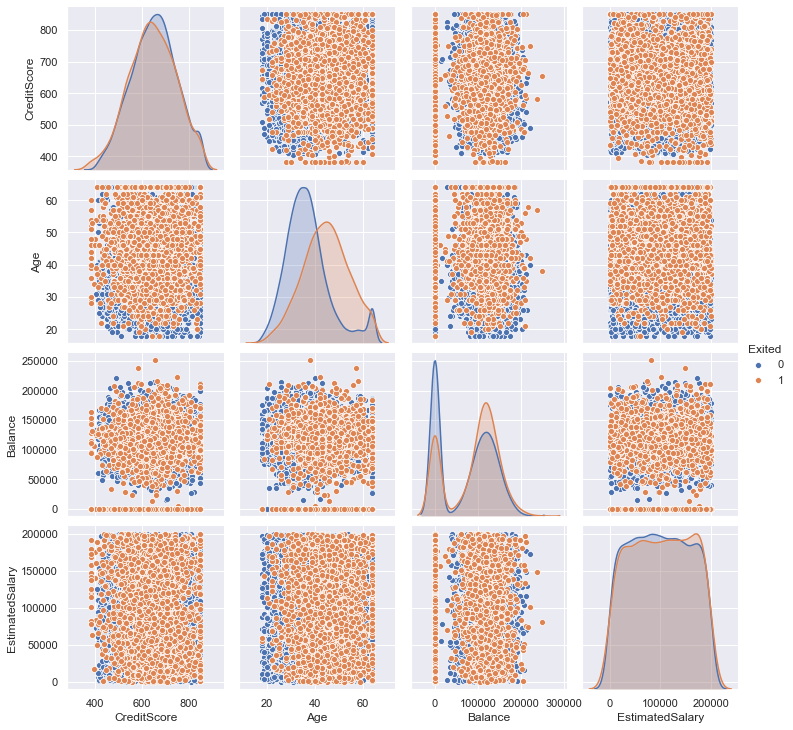

In [21]:
sns.pairplot(data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Exited']], hue='Exited')

<h3>Analysis of Pairplot:</h3>
    <ul>
        <li>We can see from the above plot that not even a single feature is responsible for linear classification and thus it means the model needs to learn non-linear decision boundary.</li>
        <li>Hence the model needs to learn some complex decision boundary which could not be learnt by simpler classifications algorithm. </li>
        </ul>

<h2>Transforming Categorical Features into Numerical Features:</h2>

In [16]:
# Mapping the Categories of Gender as: Female--> 0, Male-->1
data['Gender'] = data['Gender'].map({'Female':0, 'Male':1})
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,0,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,0,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,0,43.0,2,125510.82,1,1,1,79084.10,0


In [17]:
# Creating dummy variables of Geography:

geog_dummies_df = pd.get_dummies(data['Geography'])
data = data.join(geog_dummies_df)
data = data.drop(['Geography'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
y = data['Exited']
x = data.drop(['Exited'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

Text(1200, 1500, 'Train Data Prop.->  20.533')

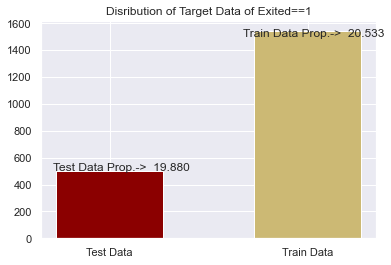

In [19]:
label_count = [y_test[y_test==1].count(), y_train[y_train==1].count()]
plt.bar(x = label_count, height=[497, 1540], tick_label=['Test Data', 'Train Data'], width=560, color=['darkred', 'C8'])
plt.title('Disribution of Target Data of Exited==1')
# They seem to have equal proportion of split of data
plt.annotate('Test Data Prop.->{0:8.3f}'.format(497/2500*100), (200, 500))
plt.annotate('Train Data Prop.->{0:8.3f}'.format(1540/7500*100), (1200, 1500))

In [20]:
print('Training Data Shape->{} with Target Feature Shape-> {}'.format(x_train.shape, y_train.shape))
print('Test Data Shape->{} with Target Feature Shape-> {}'.format(x_test.shape, y_test.shape))

Training Data Shape->(7500, 12) with Target Feature Shape-> (7500,)
Test Data Shape->(2500, 12) with Target Feature Shape-> (2500,)


In [21]:
# minimum and maximum using :
# will be used while preprocessing the features on the go:
features_max_min = {}
def min_max(features):
    global features_max_min
    for feature in features:
        max_value = x_train[feature].max()
        min_value = x_train[feature].min()

        print('Maximum -->', max_value)
        print('Minimum -->', min_value) 
        features_max_min[feature] = [max_value, min_value]

new_cols = ['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts', 'IsActiveMember', 'France',
 'Germany',
 'Spain']
min_max(new_cols)
print(features_max_min)

Maximum --> 850.0
Minimum --> 381.0
Maximum --> 1
Minimum --> 0
Maximum --> 64.0
Minimum --> 18.0
Maximum --> 10
Minimum --> 0
Maximum --> 250898.09
Minimum --> 0.0
Maximum --> 4
Minimum --> 1
Maximum --> 1
Minimum --> 0
Maximum --> 1
Minimum --> 0
Maximum --> 1
Minimum --> 0
Maximum --> 1
Minimum --> 0
{'CreditScore': [850.0, 381.0], 'Gender': [1, 0], 'Age': [64.0, 18.0], 'Tenure': [10, 0], 'Balance': [250898.09, 0.0], 'NumOfProducts': [4, 1], 'IsActiveMember': [1, 0], 'France': [1, 0], 'Germany': [1, 0], 'Spain': [1, 0]}


In [22]:
list(x_train.columns)

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'France',
 'Germany',
 'Spain']

In [23]:
# Scale of numeric features is different and hence Standard Scalar should be used:


def standard_scaler(data):
    for feature in data.columns:
        mean = np.mean(data[feature])
        std = np.std(data[feature])
        data[feature] = ((data[feature]-mean)/std)
    return data

def min_max_scaler(data):
    for feature in data.columns:
        min_val = min(data[feature])
        max_val = max(data[feature])
        data[feature] = (data[feature]-min_val)/(max_val-min_val)
    return data

In [24]:
# Creating copy of original dataset to perform min_max and standard scalar on each of them.
df1 = x_train.copy()
df2 = x_train.copy()
df1_test = x_test.copy()
df2_test = x_test.copy()

# performing both the scaling methods on the copy of training dataset:
df_std_scal = standard_scaler(df1)
df_min_max = min_max_scaler(df2)

# performing the feature scaling for test data:
df_std_test = standard_scaler(df1_test)
df_min_max_test = min_max_scaler(df2_test)

In [25]:
df_min_max_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
6252,0.458422,1.0,0.304348,0.3,0.447500,0.333333,0.0,0.0,0.208904,0.0,1.0,0.0
4684,0.515991,1.0,0.543478,0.1,0.000000,0.333333,1.0,1.0,0.731908,1.0,0.0,0.0
1731,0.469083,0.0,0.565217,0.4,0.000000,0.333333,1.0,0.0,0.292777,0.0,0.0,1.0
4742,0.266525,1.0,0.891304,0.8,0.551350,0.333333,1.0,1.0,0.853422,0.0,1.0,0.0
4521,0.381663,0.0,0.195652,0.7,0.578391,0.000000,1.0,1.0,0.573346,0.0,0.0,1.0


<h2>Feature Selection:</h2>

In [25]:
cat_feat = [feature for feature in x_train.columns if x_train[feature].nunique()<12]
cat_feat

['Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'France',
 'Germany',
 'Spain']

<h3>Chi-Sqaured Score for Categorical Features:</h3>
<p>It computes a score between each non-negative feature and class. Since it is preferred for Classification Feature Selection. Since Our numerical features seems to be normally distributed and were on different scales, so we have used Standard Scalar to perform Feature Scaling on our Numerical Features. Since Chi-square only takes Features with Positive Values, hence we can test our categorical Features over here, further we can use min-max scalar which transforms the numerical features between 0 to 1, then we can try for chi-squared score for numerical features also. </p>

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [81]:
top_cat_feat = SelectKBest(score_func=chi2, k=8)
top_cat = top_cat_feat.fit(df_min_max, y_train)

In [82]:
top_cat.scores_

array([3.55415702e-01, 4.26630919e+01, 7.24716354e+01, 3.08846950e-01,
       2.23109976e+01, 4.33800270e+00, 3.02399658e-01, 8.87737315e+01,
       1.53549752e-01, 3.90764419e+01, 1.57439519e+02, 1.38095964e+01])

Text(0.5, 1.0, 'Scores of each Categorical Feature of Chi-Squared Test')

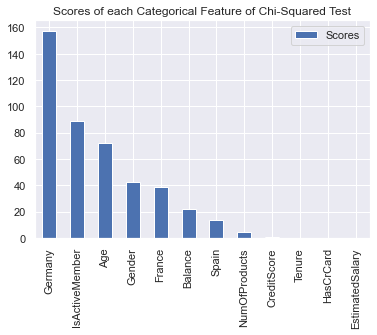

In [83]:
scores_data = pd.DataFrame(top_cat.scores_, columns=['Scores'], index=df_min_max.columns)
scores_data
scores_data.nlargest(12, 'Scores').plot(kind='bar')
plt.title('Scores of each Categorical Feature of Chi-Squared Test')

<h3>Tree Based Feature Selection:</h3>
<p>With this technique, we can observe the features which can result in purest sub-division of data, which is sone usiing information gain. Hence we can compute the importance of a feature using "feature_importance_", which will have a high score if its information gain is high and it results in division of data into pure forms. </p>

In [84]:
from sklearn.ensemble import ExtraTreesClassifier

In [85]:
trees = ExtraTreesClassifier(n_estimators=50, criterion='entropy')
trees.fit(df_min_max, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=50)

In [86]:
trees.feature_importances_

array([0.13607124, 0.02445883, 0.22321743, 0.11268826, 0.13282856,
       0.13487045, 0.02674063, 0.03655721, 0.13796818, 0.00927487,
       0.01782278, 0.00750157])

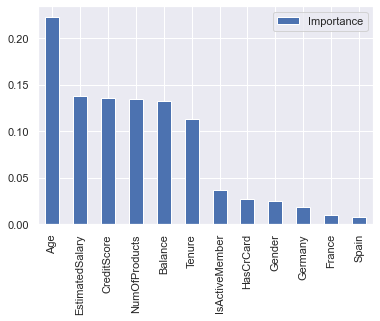

In [87]:
feat_importance = pd.DataFrame(trees.feature_importances_, columns=['Importance'], index=x_train.columns)
feat_importance.nlargest(12, 'Importance').plot(kind='bar')

<h3>Correlation Matrix</h3>
<p>Correlaion Matrix helps us to observe whether there is any multicollinearity in the data or not. Further it also helps us to investigate the most important independent features among all of the independent features with respect to the dependent feature.</p>

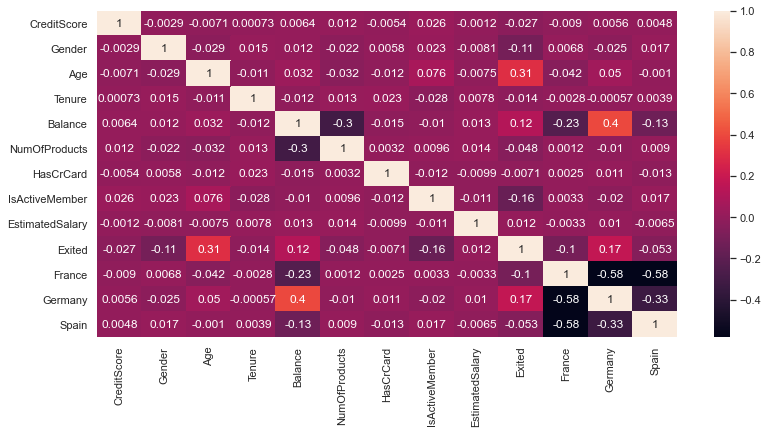

In [94]:
plt.figure(figsize=(13,6))
sns.heatmap(data.corr(), annot=True)

<ul>
    <li>No Mulicollinearity is present in our data, since we can see that the color of our matrix is basically maroon which has a range of around -0.2 to 0.2 value of correlation. Thus we can go say that there is no multicollinearity in our data,</li>
    <li>Further from this correlation matrix, we cannot straight away claim the best features for predicting our dependent feature.</li>
    </ul>

<h3>Mutual Information:</h3>
<p></p>

In [88]:
from sklearn.feature_selection import mutual_info_classif

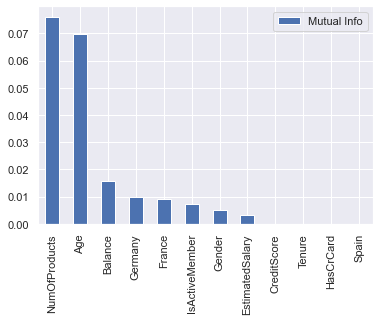

In [89]:
mutual_info = mutual_info_classif(df_min_max, y_train)
mutual_info_df = pd.DataFrame(mutual_info, columns=['Mutual Info'], index=df_min_max.columns)
mutual_info_df.nlargest(12, 'Mutual Info').plot(kind='bar')

<h3>L1 Based Feature Selection:</h3>
<p>Since we have transformed all of the features within a certain range of 0 to 1, thus we can now use LogisticRegression and LinearSVC (hypothesis learnt is pretty similar to logistic regression) in order to choose the features which are of more importance by looking at their weights. Since now all the features are ranging between 0 to 1, thus we can compare each of their weights and if any of the feature has a weight equal to 0, then we can remove that. Thus it is a sort of L1 or lasso regularization which is used for regression purpose. Further the process of selecting important features could be done by using a transfomer i.e. SelectFromModel which does feature selection based on the importance of weights. </p>

In [90]:
from sklearn.svm import LinearSVC

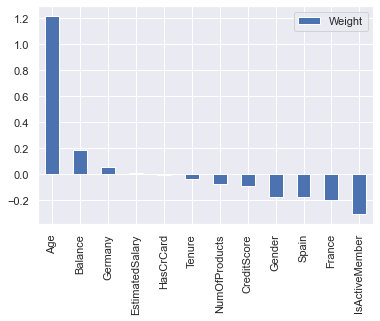

In [80]:
# Smaller the value of 'C', lesser number of features will be selected.
# for data which is scaled using min_max_scaler
lin_svc = LinearSVC(C=0.1, penalty='l1', dual=False).fit(df_min_max, y_train)
weights = lin_svc.coef_
weights_df = pd.DataFrame(np.transpose(weights), columns=['Weight'], index=df_min_max.columns)
weights_df.nlargest(12, 'Weight').plot(kind='bar')

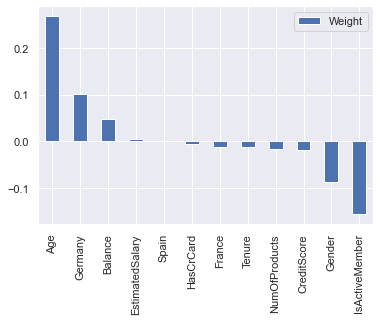

In [91]:
# for data which is standard scaler:

lin_svc = LinearSVC(C=0.1, penalty='l1', dual=False).fit(df_std_scal, y_train)
weights = lin_svc.coef_
weights_df = pd.DataFrame(np.transpose(weights), columns=['Weight'], index=df_min_max.columns)
weights_df.nlargest(12, 'Weight').plot(kind='bar')

<h3>Analysis of Feature Selection:</h3>
<ul>
    <li>HasCrCard and EstimatedSalary has been given weights = 0, both by L1-based Feature Selection and Chi-squared mechanism.</li>
    <li><b>As we have concluded from our Statistical Analysis, EstimatedSalary's mean was not varying with different categorical feature's categories. And from this L1 regularization also we found EstimatedSalary's weight getting equal to 0.</b></li>
    <li><b>From the ANOVA analysis as well, HasCrCard seems to explain the least variance or no-variance of the data and it was also reflected in L1 based regularization where it's weights are equated to 0. </b></li>
    <li>HasCrCard also does not help the model increase its predictivity of Exited Customers, thus this feature could also be removed.</li>
    <li>CreditScore was not varying for categories but the null was rejected when T-test was computed for dependent feature and thus it has some weight and didn;t become 0. Thus we can remove the 2 above features.</li>
    <li>Further we can also try to remove Tenure, if required and observe how the classification metrics such as Precision, Recall, Specificity is changed and whether it changes in the positive manner.</li>
    <li>As the value of C is reduced, regularization increases and thus lesser features are obtained, and most of their weights tend to get equal to 0.</li>
    <li> Features To Be Removed: <ol> <li>EstimatedSalary</li>
        <li>HasCrCard</li>
        <li>You can try removing Tenure and then see the performance.</li>
        </ol></li>
    </ul>

<h3>Model Building:</h3>
<p>A function will be created which simply takes the estimator and the parameters to test using GridSearchCV and one function should be created to evaluate the model.</p>

In [30]:
# globally defining the variables:

roc_curve_res = {}  # empty dict for storing fpr and tpr
auc_score_list = []  # empty list for storing auc scores
name_of_models = []  # name of all the saved models
pre_rec_res = {} # empty dict for storing precision recall values

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve


# Prints a classification report:
def classification_report(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    F1_score = f1_score(y_true, y_pred)
    metrics = [(precision), (recall), (F1_score)]
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # data frames of metrics:
    metrics_df = pd.DataFrame(metrics, index=['Precision', 'Recall', 'F1_score'], columns=['Metrics'])
    conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Pred-0', 'Pred-1'], index=['Actual-0', 'Actual-1'])
    return metrics_df, conf_matrix_df

# It plots roc-curve for the modes which are saved:
def plot_roc_curve(roc_curve_res, auc_score_list, pre_rec_res, name_of_models):
    keys_roc = list(roc_curve_res.keys())
    keys_pre = list(pre_rec_res.keys())
    
    # plotting the ROC Curve of all models:
    plt.figure(figsize=(20,8))
    plt.subplot(131);
    plt.title('ROC Curve', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    for idx in range(len(keys_roc)):
        plt.plot(roc_curve_res[keys_roc[idx]][0], roc_curve_res[keys_roc[idx]][1], label=keys_roc[idx])
        plt.grid(True)
        plt.legend()
    
    # plotting the Precision-recall curve of all the models:
    plt.subplot(132);
    plt.title('Precision Recall Curve', fontsize=16)
    plt.ylabel('Precision', fontsize=13)
    plt.xlabel('Recall', fontsize=13)
    for idx in range(len(keys_pre)):
        plt.plot(pre_rec_res[keys_pre[idx]][1], pre_rec_res[keys_pre[idx]][0], label=keys_pre[idx])
        plt.grid(True)
        plt.legend()
    
    # plotting a bar chart or pie chart comparing the area under the curve of different models:
    plt.subplot(133);
    plt.title('AUC Scores of different models', fontsize=16)
    sns.barplot(y = auc_score_list, x= name_of_models)
    plt.ylabel('AUC Score', fontsize=13)

#It contains the whole evaluation of the model:
def model_evaluate(best_model, x_test, y_test, save, name, y_pred_train):
    global roc_curve_res # empty dict for storing fpr ad tpr
    global auc_score_list # empty list for storing auc scores
    global pre_rec_res # empty dict for storing precision recall values
    global name_of_models # empty list for saving name of the models
    
    y_pred_test = best_model.predict(x_test)
    y_test_prob = best_model.predict_proba(x_test)[:, 1]
    
    metrics_train, conf_matrix_train = classification_report(y_train, y_pred_train)
    metrics_test, conf_matrix_test = classification_report(y_test, y_pred_test)
    
    #printing the classification report of training data:
    print('\nClassification Report for Training Data:')
    print('\nMetrics for Training Data:\n', metrics_train)
    print('\nConfusion Matrixs for Training Data:\n', conf_matrix_train)
    
    # printing the classification report of test data:
    print('\nClassification Report for Test Data:')
    print('\nMetrics for Test Data:\n', metrics_test)
    print('\nConfusion Matrixs for Test Data:\n', conf_matrix_test)
    
    auc_score = roc_auc_score(y_test, y_test_prob)
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
    precision, recall, threshold = precision_recall_curve(y_test, y_test_prob)
    
    # if save is true, then save tpr and fpr in dictionary and auc_score in list:
    if save == True:
        roc_curve_res[name] = [(fpr), (tpr)]
        pre_rec_res[name] = [(precision), (recall)]
        auc_score_list.append(auc_score)
        name_of_models.append(name)
        plot_roc_curve(roc_curve_res, auc_score_list, pre_rec_res, name_of_models)
    else:
        plt.figure(figsize=(10,5))
        plt.subplot(121);
        plt.plot(fpr, tpr, 'r-', label='ROC-Curve')
        plt.annotate('AUC-->{0:5.4f}'.format(auc_score), (0.5, 0.5), fontsize=10)
        plt.grid(True)
        plt.legend()
        plt.title('ROC Curve', fontsize=16)
        plt.xlabel('False Positive Rate', fontsize=13)
        plt.ylabel('True Positive Rate', fontsize=13)
        
        plt.subplot(122);
        plt.plot(recall, precision, 'b-', label='Precision Recall Curve')
        plt.annotate('AUC-->{0:5.4f}'.format(auc_score), (0.5, 0.5), fontsize=10)
        plt.grid(True)
        plt.legend()
        plt.title('Precision Recall Curve', fontsize=16)
        plt.xlabel('Recall', fontsize=13)
        plt.ylabel('Precision', fontsize=13)
    
# The best hyperparameters of the model is chosen and is then evaluated:    
def model_building(model, choose, x_train, x_test, name, parameters=None,save=False):
    if choose:
        model_ref = RandomizedSearchCV(model, parameters, cv=5 )
        best_model = model_ref.fit(x_train, y_train)
        print('Best Estimator-->', best_model.best_estimator_)
        print('Best Parameters-->', best_model.best_params_)
    else:
        best_model = model.fit(x_train, y_train)
    y_pred_train = best_model.predict(x_train)
    model_evaluate(best_model, x_test, y_test, save, name, y_pred_train = y_pred_train)

<h3>Logistic Regression:</h3>

In [27]:
from sklearn.linear_model import LogisticRegression

Best Estimator--> LogisticRegression(C=0.03, class_weight={0: 0.3, 1: 0.7}, solver='saga')
Best Parameters--> {'solver': 'saga', 'C': 0.03}

Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.523207
Recall     0.402597
F1_score   0.455046

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5395     565
Actual-1     920     620

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.500000
Recall     0.408451
F1_score   0.449612

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1800     203
Actual-1     294     203


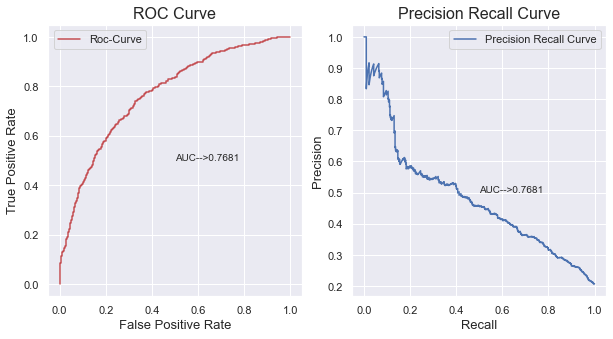

In [32]:
# multiple Attempts of Randomized Search CV:

# 1st Time:
# log_reg = LogisticRegression(penalty='l2', class_weight= {0:0.24, 1:0.76})
# parameters = {'C': [0.01, 0.1, 10], 'solver':['saga', 'sag', 'lbfgs']}
# model_building(log_reg, choose=True, parameters=parameters, save=False, name='logistic_regression')
# Result --> {'solver': 'saga', 'C': 0.01}
# Since 0.01 was chosen as the best parameter, so we would further like to reduce in that direction 
# the parameter 'C'. 

# 2nd Time:
log_reg = LogisticRegression(penalty='l2', class_weight= {0:0.3, 1:0.7})
parameters = {'C': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03], 'solver':['saga', 'sag', 'lbfgs']}
model_building(log_reg, choose=True, parameters=parameters, save=False, name='logistic_regression')

# Now the parameters seem to improve.
# Result --> {'solver': 'saga', 'C': 0.03}
# Seems to give the best result within 2 attempts only.


Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.503259
Recall     0.451299
F1_score   0.475864

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5274     686
Actual-1     845     695

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.468560
Recall     0.464789
F1_score   0.466667

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1741     262
Actual-1     266     231


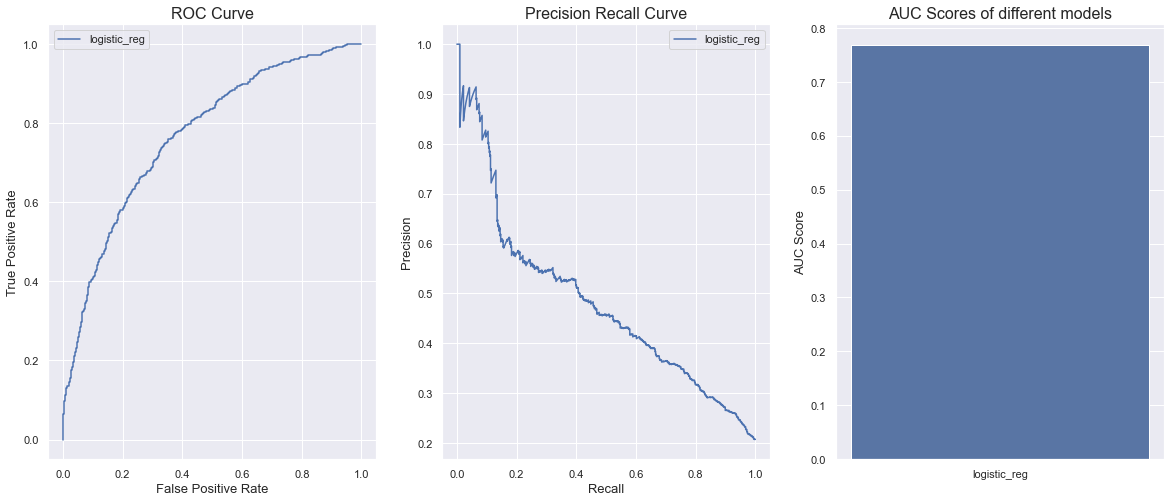

In [28]:
# model with best hyperparameters of logistic regression:

log_reg = LogisticRegression(C=0.03, class_weight={0: 0.28, 1: 0.72}, solver='saga')
model_building(log_reg, choose=False, save=True, name='logistic_reg')

<h3>Analysis of Logistic Regression:</h3>
<ul>
    <li>From the Precision-Recall Curve, we can get an idea of the maximum trade off that we can have between Precision and Recall.</li>
    <li><b>The Precision and Recall are quite close to each other i.e. around 0.46 and this means half of our positive instances are being misclassified by the algorithm while predicting as well as understanding correctly by the algorithm</b>.</li>
    <li>The ROC Curve also represents that the curve is not of the ideal nature of what we expect and hence for most of the thresholds, we can see that the false positive rate (i.e. the instances being misclassified) is quite high, which ideally should be quite low.</li>
    <li><b>AUC of Logistic Regression--> 0.7681.</b></li>
    <li>Precision on Test Data is 0.46 which means that out of all the predicted instances as positives, <b>successful predictions of positive class were 46% of all the predicted positive instances.</b></li>
    <li>Recall on Test Data is 0.46 which means that out of all the positive instances, <b>only 46%  them were successfully treated as positive by our algorithm.</b> </li>
    </ul>

<h3>Support Vector Machines:</h3>

In [26]:
from sklearn.svm import SVC

c:\python\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Estimator--> SVC(C=3000, class_weight={0: 0.3, 1: 0.7}, gamma=0.03, probability=True)
Best Parameters--> {'gamma': 0.03, 'C': 3000}

Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.630749
Recall     0.623377
F1_score   0.627041

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5398     562
Actual-1     580     960

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.609218
Recall     0.611670
F1_score   0.610442

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1808     195
Actual-1     193     304


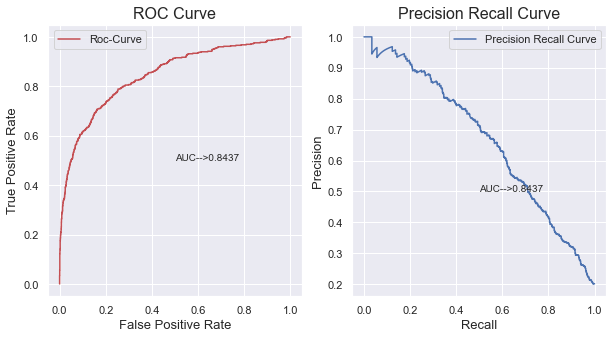

In [54]:
# Multiple Trials of Support Vector Machines using RandomizedSearchCV:

# 1st attempt:
# svc = SVC(kernel='rbf', probability=True, class_weight={0:0.3, 1:0.7})
# parameters = {'C': [0.01, 0.1, 10, 100], 'gamma': [0.00001, 0.0001 , 0.001, 0.01, 1]}
# model_building(svc, parameters, save=False, name='SVC')
# Result --> {'gamma': 0.0001, 'C': 100}
# Since value of 'C' is chosen as the right most value, so we should even increase C further and see.

# 2nd Attempt:
# svc = SVC(kernel='rbf', probability=True, class_weight={0:0.3, 1:0.7})
# parameters = {'C': [100, 300, 1000, 3000], 'gamma': [0.0001, 0.0003, 0.001, 0.003]}
# model_building(svc, parameters=parameters, choose=True, save=False, name='SVC')
# Result -->  {'gamma': 0.003, 'C': 3000}
# AUC --> 0.81 with the precision-recall curve giving a better trade-off.
# Since both of the parameters were the extremes one, so I would like to increase C and reduce gamma even more

# 3rd Attempt:
svc = SVC(kernel='rbf', probability=True, class_weight={0:0.3, 1:0.7})
parameters = {'C': [3000, 10000, 30000], 'gamma': [0.003, 0.01, 0.03]}
model_building(svc, parameters=parameters, choose=True, save=False, name='SVC')
# Result -> {'gamma': 0.03, 'C': 3000}
# These hyperparameters seems to be the best and the recall and precision has been increased by 15% 
# and the AUC has been increased by 8%. This model seems to have the best hyperparameters and 
# is working really good with required resularization to avoid the Overfitting of Training data.


Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.630749
Recall     0.623377
F1_score   0.627041

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5398     562
Actual-1     580     960

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.609218
Recall     0.611670
F1_score   0.610442

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1808     195
Actual-1     193     304


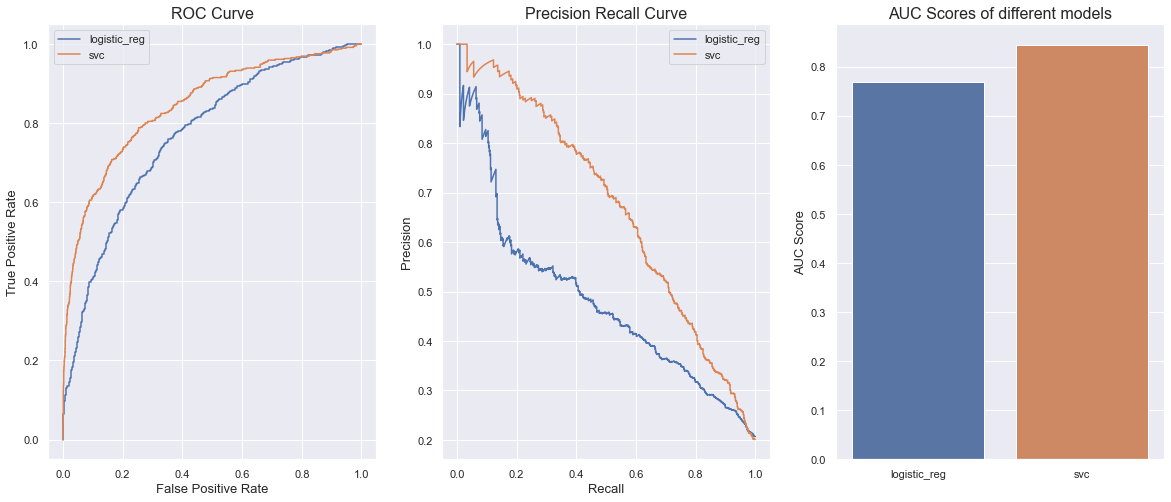

In [30]:
# model with the best hyperparameters:

svc = SVC(C=3000, class_weight={0: 0.3, 1: 0.7}, gamma=0.03, probability=True)
model_building(svc, choose=False ,save=True, name='svc')

<h3>Analysis of SVC:</h3>
<ul>
    <li>Even though the Optimization objective of SVM has been derived from Logistic Regression, SVM seems to produce the best result since it results in getting the<b> AUC Score of 0.85 with and the precision and recall of test data is 0.61.</b> From here, we can observe how powerful SVM is as compared to the other Machine Learning Algorithms.</li>
    <li>Precision and Recall have been <b>increased by 15% </b>as compared to logistic regression.</li>
    <li><b>AUC is also increased by about 7% </b>and it can be displayed in the graph of ROC-Curve and the bar-plot which shows the AUC Scores of each model with their best hyperparameters.</li>
    </ul>

<h3>Decision Tree Classifier:</h3>

In [31]:
from sklearn.tree import DecisionTreeClassifier

c:\python\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Estimator--> DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, criterion='entropy',
                       max_depth=8, max_features=5, max_leaf_nodes=16,
                       min_samples_leaf=50, min_samples_split=150)
Best Parameters--> {'min_samples_split': 150, 'min_samples_leaf': 50, 'max_leaf_nodes': 16, 'max_features': 5, 'max_depth': 8}

Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.561111
Recall     0.655844
F1_score   0.604790

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5170     790
Actual-1     530    1010

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.556492
Recall     0.663984
F1_score   0.605505

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1740     263
Actual-1     167     330


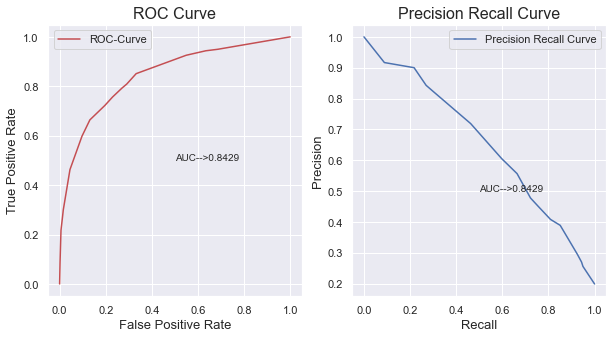

In [87]:
# Multiple Attempts in order to find the best hyperparameters for our data:

# 1st Attempt:
# decision_tree = DecisionTreeClassifier(criterion='entropy', class_weight = {0:0.27, 1:0.73})
# parameters = {'max_depth':[5, 8, 10],
  #           'min_samples_split': [50, 100, 200, 500],
   #          'min_samples_leaf': [50, 100, 200, 500],
    #         'max_leaf_nodes':[16, 32, 48], 
     #        'max_features':[2, 3, 5, 6]}
# model_building(decision_tree, parameters=parameters, save=False, choose=True, name='dec_tree')
# Result -> {'min_samples_split': 100, 'min_samples_leaf': 100, 'max_leaf_nodes': 16, 
# 'max_features': 5, 'max_depth': 8}
# AUC-> 0.81
# I further want to do a finer RandomizedSearchCV and so based upon the values, I would try to choose 
# values around these ones in order to be more precise. 

# 2nd Attempt:
# decision_tree = DecisionTreeClassifier(criterion='entropy', class_weight = {0:0.27, 1:0.73})
# parameters = {'max_depth':[5, 8, 10],
 #              'min_samples_split': [80, 100, 150],
  #            'min_samples_leaf': [80, 100, 150],
   #          'max_leaf_nodes':[4, 8, 16, 20], 
    #         'max_features':[2, 3, 5, 6]}
# model_building(decision_tree, parameters=parameters, save=False, choose=True, name='dec_tree')
# Result -> {'min_samples_split': 150, 'min_samples_leaf': 80, 'max_leaf_nodes': 16, 
# 'max_features': 3, 'max_depth': 8}
# AUC -> 0.82
# The AUC Score has increased this time by 1% and hence try to adjust the parameters-> min_samples_split,
# min_samples_leaf

# 3rd Attempt:
# decision_tree = DecisionTreeClassifier(criterion='entropy', class_weight = {0:0.27, 1:0.73})
# parameters = {'max_depth':[8],
  #             'min_samples_split': [130, 150, 180, 200],
   #           'min_samples_leaf': [50, 60, 80, 100],
    #         'max_leaf_nodes':[4, 8, 16], 
     #        'max_features':[2, 3, 5, 6]}
# model_building(decision_tree, parameters=parameters, save=False, choose=True, name='dec_tree')
# AUC -> 0.82
# Result -> {'min_samples_split': 130, 'min_samples_leaf': 60, 'max_leaf_nodes': 16, 
# 'max_features': 5, 'max_depth': 8}

# 4th Attempt:
decision_tree = DecisionTreeClassifier(criterion='entropy', class_weight = {0:0.27, 1:0.73})
parameters = {'max_depth':[8],
               'min_samples_split': [110, 130, 150],
              'min_samples_leaf': [50, 60, 80],
             'max_leaf_nodes':[16], 
             'max_features':[5]}
model_building(decision_tree, parameters=parameters, save=False, choose=True, name='dec_tree')
# AUC -> 0.8279
# Result -> {'min_samples_split': 110, 'min_samples_leaf': 50, 'max_leaf_nodes': 16, 
 #'max_features': 5, 'max_depth': 8}
# It seems that we have the best hyperparameters of DecisionTree and we can create our final model using
# these hyperparameters. Further I also tried adjusting some of the values, but that resulted in reducing
# AUC, so these values seem to be working good with our model.


Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.571885
Recall     0.581169
F1_score   0.576490

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5290     670
Actual-1     645     895

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.571984
Recall     0.591549
F1_score   0.581602

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1783     220
Actual-1     203     294


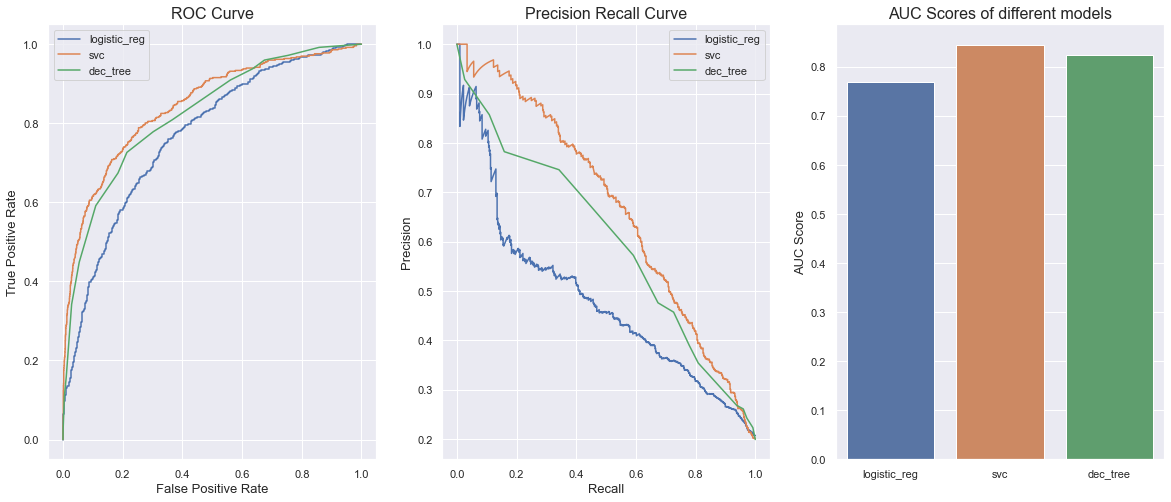

In [32]:
dec_tree =  DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, criterion='entropy',
                       max_depth=8, max_features=5, max_leaf_nodes=16,
                       min_samples_leaf=50, min_samples_split=150, random_state=4)

model_building(dec_tree, parameters=None, choose=False, save=True, name='dec_tree')

<h3>Analysis of Decision Tree:</h3>
<ul>
    <li>The model of Decision Tree works<b> better than Logistic Regression but worse than SVC </b>which can be observed from the graphs above of ROC, AUC Scores of Different Model.</li>
    <li><b>AUC Score of Decision Trees is --> 0.82</b>, which can be observed from the 3rd Graph.</li>
    <li><b>Recall is of 0.59 and Precision is of 0.59</b> for Decision Trees.</li>
    </ul>

<h3>Random Forest Classifier:</h3>

In [33]:
from sklearn.ensemble import RandomForestClassifier

Best Estimator--> RandomForestClassifier(class_weight={0: 0.25, 1: 0.75}, criterion='entropy',
                       max_depth=2, max_features=2, max_leaf_nodes=4,
                       max_samples=1000, min_samples_leaf=100,
                       min_samples_split=600, n_estimators=150)
Best Parameters--> {'n_estimators': 150, 'min_samples_split': 600, 'min_samples_leaf': 100, 'max_samples': 1000, 'max_leaf_nodes': 4, 'max_features': 2, 'max_depth': 2}

Classification Report for Training Data:

Metrics for Training Data:
            Metrics
Precision  0.65075
Recall     0.30974
F1_score   0.41971

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5704     256
Actual-1    1063     477

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.633858
Recall     0.323944
F1_score   0.428762

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1910      93
Actual-1     336     161


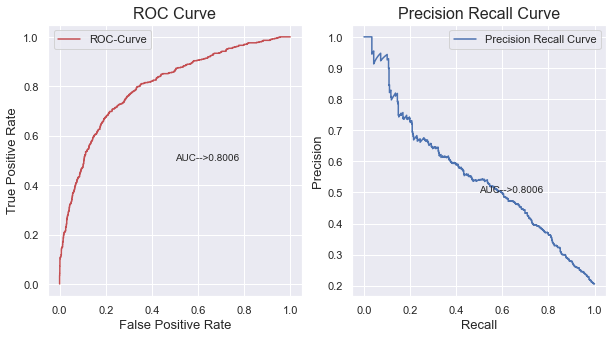

In [42]:
# Multiple attempts to choose the best hyperparameters:

# 1st attempt:
# forest = RandomForestClassifier(n_estimators=200, bootstrap=True, criterion='entropy', class_weight = {0:0.25, 1:0.75})
# parameters = {'max_depth':[2, 3, 5],
 #            'min_samples_split': [100, 200, 500],
  #           'min_samples_leaf': [100, 200, 500],
   #          'max_leaf_nodes':[2, 4, 8, 16], 
    #         'max_features':[2, 3, 5],
     #        'max_samples': [800, 1000, 1200]}
# model_building(forest, parameters=parameters, save=False, choose=True, name='rand_forest')
# Reslut ->  {'min_samples_split': 500, 'min_samples_leaf': 200, 'max_samples': 1000, 
  #          'max_leaf_nodes': 4, 'max_features': 2, 'max_depth': 3}
# I try to do a finer Randomized Search for Random Forest by testing for the value which seems to be 
#around the values found to be the best for this case.

# 2nd Attempt:
# forest = RandomForestClassifier(bootstrap=True, criterion='entropy', class_weight = {0:0.25, 1:0.75})
# parameters = {'max_depth':[2, 3, 4],
  #           'n_estimators': [100, 150, 200],
   #         'min_samples_split': [400, 500, 550, 600],
    #         'min_samples_leaf': [150, 200, 250, 300],
     #        'max_leaf_nodes':[3, 4, 5, 6], 
      #       'max_features':[1, 2, 3, 4],
       #      'max_samples': [900, 1000, 1100]}
# model_building(forest, parameters=parameters, save=False, choose=True, name='rand_forest')
# Result -> {'n_estimators': 150, 'min_samples_split': 600, 'min_samples_leaf': 150, 
  #         'max_samples': 1000, 'max_leaf_nodes': 4, 'max_features': 2, 'max_depth': 3}
# AUC-> 0.80.
# We can increase further min_samples_split and we can reduce min_samples_leaf, rest of them are working
# pretty good.
    
# 3rd Attempt:
forest = RandomForestClassifier(bootstrap=True, criterion='entropy', class_weight = {0:0.25, 1:0.75})
parameters = {'max_depth':[2, 3, 4],
             'n_estimators': [125, 150, 175],
            'min_samples_split': [600, 650, 700, 750, 800],
             'min_samples_leaf': [150, 125, 100, 75, 50],
             'max_leaf_nodes':[4], 
             'max_features':[2],
             'max_samples': [950, 1000, 1050]}
model_building(forest, parameters=parameters, save=False, choose=True, name='rand_forest')
# Result -> {'n_estimators': 125, 'min_samples_split': 650, 'min_samples_leaf': 100, 
  #         'max_samples': 950, 'max_leaf_nodes': 4, 'max_features': 2, 'max_depth':2}
# AUC-> 0.802
# The features which we were trying to control are now quite controlled but I think now, we can try 
# some more values of features whose single values were taken. 
# I tried with other values as well but this was the best that we could get from Random Forest.


Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.515152
Recall     0.507792
F1_score   0.511445

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5224     736
Actual-1     758     782

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.511583
Recall     0.533199
F1_score   0.522167

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1750     253
Actual-1     232     265


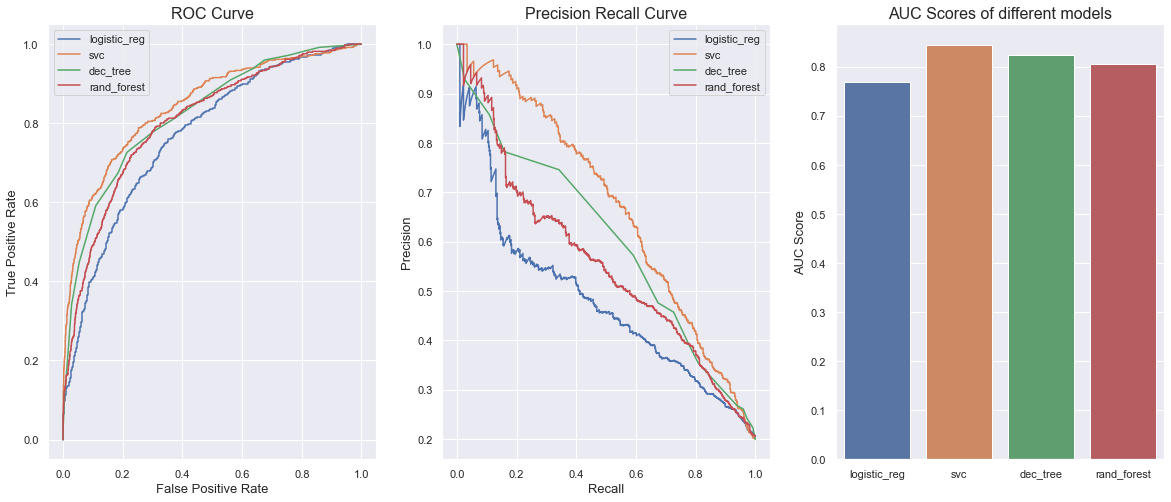

In [34]:
# best hyperparameters of Random Forest:

rand_forest = RandomForestClassifier(class_weight={0: 0.23, 1: 0.77}, criterion='entropy',
                       max_depth=2, max_features=2, max_leaf_nodes=4,
                       max_samples=1000, min_samples_leaf=100,
                       min_samples_split=600, n_estimators=150, random_state=2)

model_building(rand_forest, choose=False, save=True, parameters=None, name='rand_forest' )

<h3>Analysis of Random Forest:</h3>
<ul>
    <li><b>AUC--> 0.8044 on Tests Data.</b></li>
    <li><b>Precision = 0.51 and Recall=0.53, which seems to perform worse than Decision Trees</b>. It is quite hard to digest since it was expected that Random Forest will give us better results than Decision Tree. In our case , it is the opposite and it seems that with our data, a single Decision Tree seems to work a lot better as compared to the forest of Decision trees which are trained on different subset of features and rows(Random Forest). </li>
    <li>Till now, it seems<b> Support Vector Machines are performing the best based upon our data</b>, but they take more time as well while computing the result since kernel technique is there which takes each and every data point i.e. 7500 training points and consider each of them as landmark and compute the feature vector based upon 7500 landmarks, thus there is a lot of computation involved under the hood.(example of landmarks are considered since I have used Radial Basis Function kernel.)</li>
    </ul>

<h3>Xtreme Gradient Boosting:</h3>

In [35]:
from xgboost import XGBClassifier

In [66]:
clf_xgb = XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(df_min_max, 
            y_train, 
            verbose=True, 
            eval_metric = 'aucpr',
            early_stopping_rounds=10, 
            eval_set=[(df_min_max_test, y_test)])

[0]	validation_0-aucpr:0.65496
[1]	validation_0-aucpr:0.66948
[2]	validation_0-aucpr:0.67865
[3]	validation_0-aucpr:0.68432
[4]	validation_0-aucpr:0.68771
[5]	validation_0-aucpr:0.69233
[6]	validation_0-aucpr:0.69397
[7]	validation_0-aucpr:0.69646
[8]	validation_0-aucpr:0.69239
[9]	validation_0-aucpr:0.68989
[10]	validation_0-aucpr:0.68920
[11]	validation_0-aucpr:0.69008
[12]	validation_0-aucpr:0.69076
[13]	validation_0-aucpr:0.69385
[14]	validation_0-aucpr:0.69320
[15]	validation_0-aucpr:0.69472
[16]	validation_0-aucpr:0.69210


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

c:\python\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Best parameters--> {'scale_pos_weight': 1, 'reg_lambda': 5, 'max_depth': 10, 'learning_rate': 0.003, 'gamma': 1}
Best Estimators --> XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.003, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.841574
Recall     0.541558
F1_score   0.659028

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5803     157
Actual-1     706     834

Classification Report

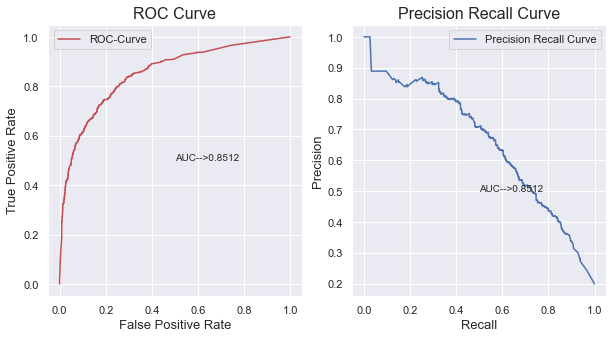

In [59]:
# Multiple Attempts::
# Parameters of XGBoost:

# For maintaining weights of imbalanced classes, we can use scale_pos_weight:
# scale_pos_weight is the ratio of sum(negative instances)/sum(positive instances)
# subsample means the percentage of data used to create each of XGBoost tree.
# gamma is the parameter whose value is used to prune the tree i.e. its value 
#is compared to the gain of a node in the tree and if the value is less, 
#then the node is pruned.
# colsample_by_tree is the is the percentage of columns used for creating each of the tree.
# reg_lambda is used to regularize the tree.

# Attempt - 1:
# clf_xgb = XGBClassifier(objective='binary:logistic', missing=None, 
                        # colsample_by_tree=0.5, subsample=0.9, n_estimators=100)
# parameters = {'learning_rate':[0.001, 0.01, 0.1],
  #            'max_depth':[2, 6, 10],
   #          'gamma': [0.01, 0.1,  1],
    #         'reg_lambda':[0.01, 0.1, 1, 10],
     #        'scale_pos_weight':[3, 5, 7]}

# Using RandomizedSearchCV for predicting the va
# grd_search = RandomizedSearchCV(clf_xgb, param_distributions=parameters)
# best_model = grd_search.fit(df_min_max, y_train, 
                  #          eval_metric = 'auc',
                   #         early_stopping_rounds=10, 
                    #        eval_set=[(df_min_max_test, y_test)])
# print('Best parameters-->', best_model.best_params_)
# print('Best Estimators -->', best_model.best_estimator_)
# model_building(clf_xgb, choose=True, save=False, parameters=parameters, name='xgb_clf')
# Result -> {'scale_pos_weight': 3, 'reg_lambda': 1, 'max_depth': 10, 'learning_rate': 0.001, 
# 'gamma': 0.01}

# Attempt - 2:
#clf_xgb = XGBClassifier(objective='binary:logistic', missing=None, 
 #                       subsample=0.9, n_estimators=100)

#parameters = {'learning_rate':[0.0001, 0.0003, 0.001, 0.003],
 #             'max_depth':[8, 10, 12, 14],
  #            'gamma': [0.001, 0.003, 0.01, 0.03],
   #           'reg_lambda':[0.3, 1, 3, 5],
    #          'scale_pos_weight':[1, 2, 3, 4]}

# Using GridSearchCV for predicting the va
#grd_search = RandomizedSearchCV(clf_xgb, param_distributions=parameters)
#best_model = grd_search.fit(df_min_max, y_train, 
             #               eval_metric = 'auc',
              #              verbose = False)
#print('Best parameters-->', best_model.best_params_)
#print('Best Estimators -->', best_model.best_estimator_)
#model_evaluate(best_model=best_model, x_test = df_min_max_test, y_test = y_test, save=False, name='xgb_clf')
# Result -> Best parameters--> {'scale_pos_weight': 1, 'reg_lambda': 5, 'max_depth': 10, 
# 'learning_rate': 0.0001, 'gamma': 0.03}

# Attempt-3:
clf_xgb = XGBClassifier(objective='binary:logistic', missing=None, 
                        subsample=0.9, n_estimators=100)

parameters = {'learning_rate':[0.0001, 0.0003, 0.001, 0.003],
              'max_depth':[10],
              'gamma': [0.1, 0.3, 1],
              'reg_lambda':[5, 7, 10],
              'scale_pos_weight':[0.1, 0.5, 1, 2]}

# Using GridSearchCV for predicting the va
grd_search = RandomizedSearchCV(clf_xgb, param_distributions=parameters)
best_model = grd_search.fit(df_min_max, y_train, 
                            eval_metric = 'auc',
                            verbose = False)
print('Best parameters-->', best_model.best_params_)
print('Best Estimators -->', best_model.best_estimator_)
model_evaluate(best_model=best_model, x_test = df_min_max_test, y_test = y_test, save=False, name='xgb_clf')


c:\python\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.656232
Recall     0.721429
F1_score   0.687287

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5378     582
Actual-1     429    1111

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.608209
Recall     0.655936
F1_score   0.631171

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1793     210
Actual-1     171     326


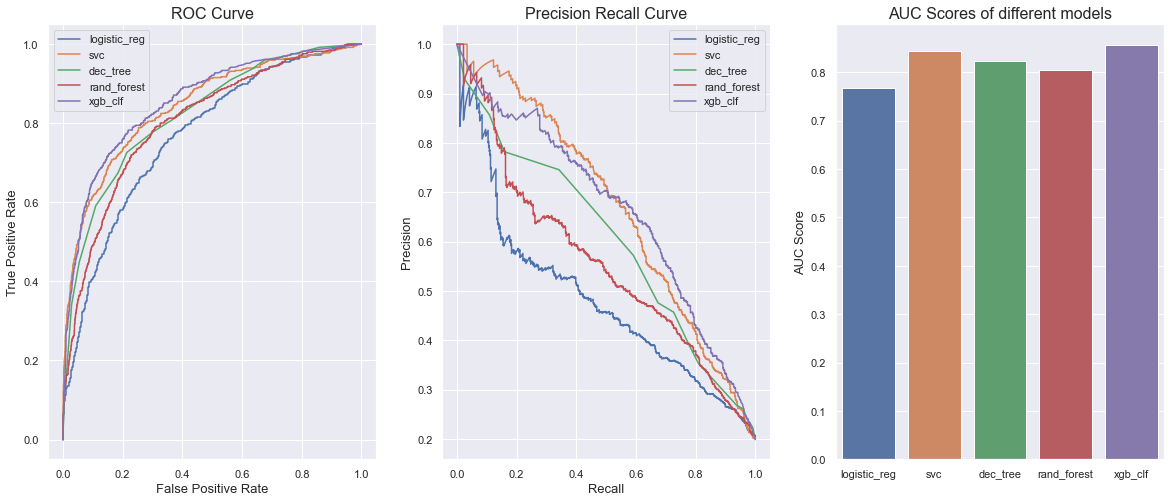

In [70]:
# best hyperparameters of the model:

xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.003, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=5, reg_lambda=5, scale_pos_weight=2.5, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

model_building(xgb_clf, choose=False, save=True, parameters=None, name='xgb_clf')
# By ajusting reg_alpha to 5, the problem of overfitting was adjusted.

<h3>Analysis of XGBoost Classifier:</h3>
<ul>
    <li>AUC is the best among all the models i.e. AUC-> 0.8562.</li>
    <li>Earlier the model seemed to overfit the data, but by setting reg_alpha=5, regularization was increased. Further seeting the nice trade-off between precision and recall, scale_pos_weight was tweaked a bit.</li>
    <li>Precision on Test Data -> 0.608 and Recall on Test data-> 0.65. This is the best trade-off that we got among all of our models.</li>
    <li>Hence this model definitely seems to be working really well. But the downside is there are a lot of hyperparameters associated with this model, where as<b>with SVM, the AUC-> 0.841,</b> and there are just 2 hyperparameters with it, so I would rather go for SVM, since in future, if more data comes, or I wanted to change my model,<b> so hyperparameter tuning will be easier in SVM, as compared to XGBosst.</b> And there <b>is just 1% extra of AUC that XGBoost is giving, so we can select the best model as that of SUpport Vector Machines.</b></li>
    </ul>

<h2>After Removing the Non-Important Features</h2>
<p>Since we found 3 features which were not explaining any of the variance and hence we should try remove those features and see how our model behaves. Since our best model performance was given by SVM, so we would train the model directly on SVM's and see whether Precision, Recall and AUC improves or not. The two features which are to be removed are: <ol> <li>EstimatedSalary</li>  <li>HasCrCard</li> <li>Tenure</li></ol></p>

In [27]:
# Creating copies of sacled train and test data:

feat_rem_train = df_min_max.copy()
feat_rem_test = df_min_max_test.copy()

# Removing the abose 2 listed Features, which explained none variance of data:
# Labels of training and test data remains the same:
feat_rem_train = feat_rem_train.drop(['EstimatedSalary', 'HasCrCard', 'Tenure'], axis=1)
feat_rem_test = feat_rem_test.drop(['EstimatedSalary', 'HasCrCard', 'Tenure'], axis=1)

In [29]:
# training data :
feat_rem_train.loc[1].values

array([0.48400853, 0.        , 0.5       , 0.1       , 0.33403148,
       0.        , 1.        , 0.        , 0.        , 1.        ])

In [28]:
feat_rem_test.head()

,CreditScore,Gender,Age,Balance,NumOfProducts,IsActiveMember,France,Germany,Spain
6252,0.458422,1.0,0.304348,0.447500,0.333333,0.0,0.0,1.0,0.0
4684,0.515991,1.0,0.543478,0.000000,0.333333,1.0,1.0,0.0,0.0
1731,0.469083,0.0,0.565217,0.000000,0.333333,0.0,0.0,0.0,1.0
4742,0.266525,1.0,0.891304,0.551350,0.333333,1.0,0.0,1.0,0.0
4521,0.381663,0.0,0.195652,0.578391,0.000000,1.0,0.0,0.0,1.0


<h3>Trying with SVM:</h3>

c:\python\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Estimator--> SVC(C=1000, class_weight={0: 0.3, 1: 0.7}, gamma=0.03, probability=True)
Best Parameters--> {'gamma': 0.03, 'C': 1000}

Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.634478
Recall     0.575974
F1_score   0.603812

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5449     511
Actual-1     653     887

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.621739
Recall     0.575453
F1_score   0.597701

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1829     174
Actual-1     211     286


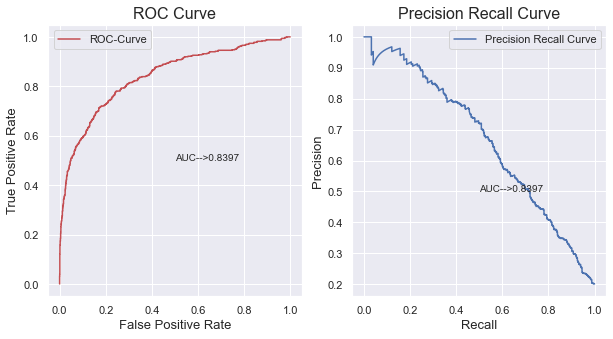

In [84]:
# 1st Attempt: (Choosing the hyperparameters from the Best SVC Model)
# svc = SVC(kernel='rbf', probability=True, class_weight={0:0.3, 1:0.7})
# parameters = {'C': [1000, 3000, 10000], 'gamma': [0.003, 0.01, 0.03]}
# model_building(svc, x_train = feat_rem_train, x_test = feat_rem_test, parameters=parameters, choose=True, save=False, name='SVC')
# Result ->  {'gamma': 0.03, 'C': 1000}
# WE can try to further reduce C and increase 'gamma' since they were on the boudaries.

# 2nd Attempt:
# svc = SVC(kernel='rbf', probability=True, class_weight={0:0.3, 1:0.7})
# parameters = {'C': [10, 100, 1000], 'gamma': [0.03, 0.1, 1]}
# model_building(svc, x_train = feat_rem_train, x_test = feat_rem_test, parameters=parameters, choose=True, save=False, name='SVC')

# 3rd Attempt:
svc = SVC(kernel='rbf', probability=True, class_weight={0:0.3, 1:0.7})
parameters = {'C': [10, 100, 1000], 'gamma': [0.03, 0.1]}
model_building(svc, x_train = feat_rem_train, x_test = feat_rem_test, parameters=parameters, choose=True, save=False, name='SVC')



Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.613725
Recall     0.609740
F1_score   0.611726

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5369     591
Actual-1     601     939

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.594810
Recall     0.599598
F1_score   0.597194

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1800     203
Actual-1     199     298


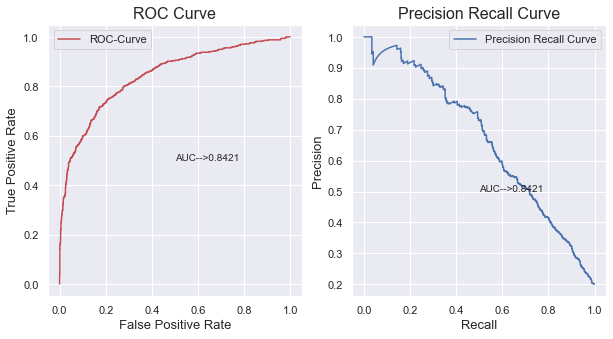

In [31]:
svc = SVC(C=1000, class_weight={0: 0.28, 1: 0.72}, gamma=0.03, probability=True)
model_building(svc, x_train = feat_rem_train, x_test = feat_rem_test, parameters=None, 
               choose=False, save=False, name='SVC')

# This is the best we could get.
# there is hardly any improvement from the previous one after removing the features.
# It might be because SVM itself encompasses l2-regularization in its algorithm, so the previous time,
# it might have made the weights of these 2 features quite less.


Classification Report for Training Data:

Metrics for Training Data:
             Metrics
Precision  0.610966
Recall     0.607792
F1_score   0.609375

Confusion Matrixs for Training Data:
           Pred-0  Pred-1
Actual-0    5364     596
Actual-1     604     936

Classification Report for Test Data:

Metrics for Test Data:
             Metrics
Precision  0.587426
Recall     0.601610
F1_score   0.594433

Confusion Matrixs for Test Data:
           Pred-0  Pred-1
Actual-0    1793     210
Actual-1     198     299


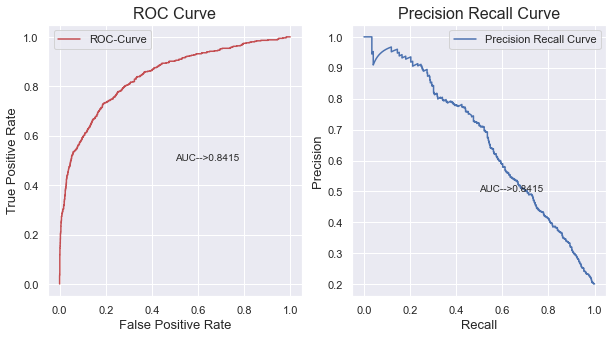

In [32]:
svc = SVC(C=1000, class_weight={0: 0.28, 1: 0.72}, gamma=0.03, probability=True)
model_building(svc, x_train = feat_rem_train, x_test = feat_rem_test, parameters=None, 
               choose=False, save=False, name='SVC')


In [33]:
feat_rem_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'France', 'Germany', 'Spain'],
      dtype='object')

<h3>Final Analysis of SVM:</h3>
<ul>
    <li>There seems to be no deprovement in the model after the features have been removed, the model seems to perform the same way and this means the model is working exactly the same way as earlier and hence these 3 of the features did not have much impact on the model..</li>
    <li><b>AUC--> 0.842 with Precision and Recall --> 0.60</b> which was similar to the first model when we considered all the features.</li>
    <li>This might be because in the<b> optimization objective we have l2 regularization term, which might have set the weights of these 2 features = 0 </b> and due to this we were getting the same result as we got now when we removed the un-important features.</li>
    <li>Thus now I would save my model's weights using pickle.</li>
    </ul>

In [37]:
# saving the model.
import pickle

In [38]:
# saving the model's weights:
filename = 'model_final.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [36]:
new_dict = {'creditscore': 670, 'gender': 0, 'age': 35,  
            'balance': 10000, 'num_of_products': 2, 'activemember': 1, 
            'France': 1, 'Germany': 0, 'Spain': 0}

data = np.array(list(new_dict.values())).reshape((1,9))
print(data)
# predicting from importing the files :
loaded_model = pickle.load(open('model.pkl', 'rb'))
loaded_model.predict_proba(data)

[[  670     0    35 10000     2     1     1     0     0]]


array([[3.0000009e-14, 1.0000000e+00]])